# <center><span style="font-size:100px ; color:blue">Projet 06:</span> </center>

## <center><span style="font-size:50px ; color:rgb(51,51,51)">Analysez les ventes d'une librairie avec <span style="font-size:50px ; color:red">R</span> ou <span style="font-size:50px ; color:red">Python</span></span></center>

# Sommaire
1. [Importation des librairies](#1.-Importation-des-librairies)  
2. [Importation et nettoyage des données](#2.-Importation-et-nettoyage-des-données)  
  2.1. [Données Clients](#2.1.-Données-Clients)  
  2.2. [Données Produits](#2.2.-Données-Produits)  
  2.3. [Données Transactions](#2.3.-Données-Transactions)  
3. [Jointure des données](#3.-Jointure-des-données)  
4. [Chiffre d'affaire](#4.-Chiffre-d'affaire)  
  4.1. [Chiffre d'affaire total](#4.1.-Chiffre-d'affaire-total)  
  4.2. [Chiffre d'affaire journalier](#4.2.-Chiffre-d'affaire-journalier)  
  4.3. [Chiffre d'affaire mensuel](#4.3.-Chiffre-d'affaire-mensuel)  
  4.4. [Chiffre d'affaires par mois et par catégories](#4.4.-Chiffre-d'affaires-par-mois-et-par-catégories)  
5. [Les produits](#5.-Les-produits)  
  5.1. [Nombre de ventes des produits (Tops et Flops)](#5.1.-Nombre-de-ventes-des-produits-(Tops-et-Flops))  
  5.2. [Nombre de ventes des produits (Tops et Flops) par catégorie](#5.2.-Nombre-de-ventes-des-produits-(Tops-et-Flops)-par-catégorie)  
  5.3. [Répartition des produits vendus entre les clients](#5.3.-Répartition-des-produits-vendus-entre-les-clients)  
  5.4. [Répartition du chiffre d'affaire entre les produits](#5.4.-Répartition-du-chiffre-d'affaire-entre-les-produits)  
6. [Les clients](#6.-Les-clients)  
  6.1. [Genre des clients](#6.1.-Genre-des-clients)  
  6.2. [Âge des clients](#6.2.-Âge-des-clients)  
  6.3. [Chiffre d'affaire par client](#6.3.-Chiffre-d'affaire-par-client)  
7. [Liens entre variables](#7.-Liens-entre-variables)  
  7.1. [Lien entre le genre et la catégorie de livre acheté](#7.1.-Lien-entre-le-genre-et-la-catégorie-de-livres-achetés)  
  7.2. [Lien entre l'âge et montant total des achats](#7.2.-Lien-entre-l'âge-et-montant-total-des-achats)  
  7.3. [Lien entre l'âge et la fréquence d'achat](#7.3.-Lien-entre-l'âge-et-la-fréquence-d'achat)    
  7.4. [Lien entre l'âge et montant du panier moyen](#7.4.-Lien-entre-l'âge-et-montant-du-panier-moyen)  
  7.5. [Lien entre l'âge et la catégorie de livres achetés](#7.5.-Lien-entre-l'âge-et-la-catégorie-de-livres-achetés)  

# 1. Importation des librairies
↺ [Sommaire](#Sommaire)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy.stats 
import statsmodels
import matplotlib.patches

# 2. Importation et nettoyage des données

## 2.1. Données Clients
↺ [Sommaire](#Sommaire)

In [2]:
cust = pd.read_csv('C:\\Users\\Dell\\Desktop\\data_analyst_path\\Projet06_Analysez les ventes d\'une librairie avec R ou Python\\Mission\\DAN-P6-donnees\\customers.csv')
cust

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
# 
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
# description de tous les colonnes du dataframe
cust.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [5]:
# Traitement des doublons de 'client_id'
cust.duplicated('client_id').sum()

0

pas de doublons

In [6]:
# Recherche de valeurs null
cust.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

aucune valeur nulle

In [7]:
# Calcul de la répartition des clients selon leurs sexe
sexe = cust['sex'].value_counts().reset_index()
femme = sexe['sex'][0]
homme = sexe['sex'][1]

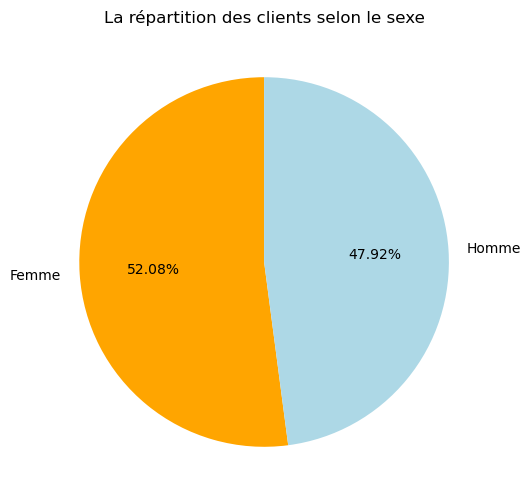

In [8]:
# Représentation graphique de la répartition selon le sexe
# Données pour le pie chart
labels = ['Femme', 'Homme']
sizes = [femme, homme]
# Couleurs pour chaque partie du pie chart
colors = ['orange', 'Lightblue']
plt.figure(figsize=(8, 6))
# Création du pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
# Ajout d'un titre
plt.title('La répartition des clients selon le sexe')
# Affichage du graphique
plt.show()

In [9]:
# Calcul d'âges des clients
temp_présent = datetime.datetime.now()
date = temp_présent.date()
année = int(date.strftime("%Y"))
année

2023

In [10]:
# Création de la colonne 'age'
cust['age'] = année - cust['birth']
cust.sort_values(by='age')

,client_id,sex,birth,age
1920,c_3923,f,2004,19
7318,c_1358,f,2004,19
1045,c_7765,m,2004,19
1049,c_3004,m,2004,19
1053,c_3329,m,2004,19
...,...,...,...,...
1086,c_3218,f,1930,93
3994,c_4679,f,1930,93
4569,c_577,m,1929,94
2491,c_8362,f,1929,94


In [11]:
# Calcul de l'age moyen des Femmes et des Hommes
age_femme = cust.loc[cust['sex']=="f"]['age'].mean()
age_homme = cust.loc[cust['sex']=="m"]['age'].mean()
print('L\'age moyen des Femmes moyen est de:', int(age_femme),'ans')
print('L\'age moyen des Hommes moyen est de:', int(age_homme),'ans')

L'age moyen des Femmes moyen est de: 45 ans
L'age moyen des Hommes moyen est de: 44 ans


In [12]:
# La répartition des ages selon le sexe du client
graph = cust.groupby('age')[['sex']].value_counts()
graph = graph.to_frame().reset_index()
graph = graph.pivot(columns='sex', index='age')[[0]].reset_index()
graph = graph.rename(columns={'f':'femme',
                              'm':'homme'})
graph

age     0      
sex     femme homme
0    19   232   208
1    20    65    81
2    21    66    80
3    22    72    57
4    23    78    58
..   ..   ...   ...
71   90     5     3
72   91     5     1
73   92     2     2
74   93     3     1
75   94     1     2

[76 rows x 3 columns]

In [13]:
femmes = cust[cust['sex']=='f'].groupby('age').count()['sex'].tolist()
hommes = cust[cust['sex']=='m'].groupby('age').count()['sex'].tolist()

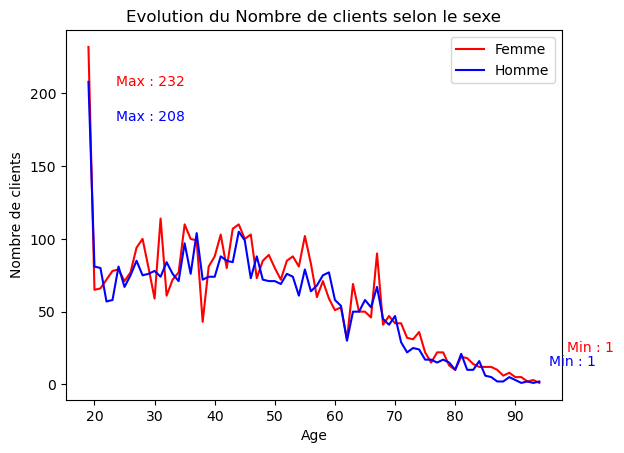

<Figure size 1000x600 with 0 Axes>

In [14]:
# Création d'une nouvelle figure et d'un sous-plot
fig, ax = plt.subplots()

# Tracé des courbes pour les deux variables
plt.figure(figsize=(10,6))
ax.plot(graph['age'], femmes, color='red', label='Femme')
ax.plot(graph['age'], hommes, color='blue', label='Homme')

# Calcul de la valeur maximale et de la valeur minimale pour y1
femmes_max = max(femmes)
femmes_min = min(femmes)
hommes_max = max(hommes)
hommes_min = min(hommes)

# Ajout de légendes pour les axes et le graphique
ax.set_xlabel('Age')
ax.set_ylabel('Nombre de clients')
ax.set_title('Evolution du Nombre de clients selon le sexe')
ax.legend()

# Ajout des annotations pour les valeurs maximale et minimale de y1
ax.annotate(f'Max : {femmes_max}', xy=(graph['age'][femmes.index(femmes_max)], femmes_max), xytext=(20, -20),color='r',
            textcoords='offset points', ha='left', va='top')
ax.annotate(f'Min : {femmes_min}', xy=(graph['age'][femmes.index(femmes_min)], femmes_min), xytext=(20, 20),color='r',
            textcoords='offset points', ha='left', va='bottom')
ax.annotate(f'Max : {hommes_max}', xy=(graph['age'][hommes.index(hommes_max)], hommes_max), xytext=(20, -20),color='b',
            textcoords='offset points', ha='left', va='top')
ax.annotate(f'Min : {hommes_min}', xy=(graph['age'][hommes.index(hommes_min)], hommes_min), xytext=(20, 20),color='b',
            textcoords='offset points', ha='left', va='top')

# Affichage du graphique
plt.show()

In [15]:
# Affichage des clients qui ont effectué le max des achats (19 ans)
cust.loc[cust['age'] == 19]

,client_id,sex,birth,age
43,c_1046,m,2004,19
71,c_3081,m,2004,19
95,c_1418,f,2004,19
101,c_3338,m,2004,19
106,c_1774,f,2004,19
...,...,...,...,...
8584,c_461,f,2004,19
8594,c_294,m,2004,19
8598,c_5339,f,2004,19
8606,c_4077,m,2004,19


In [16]:
# Suppression des clients "ct_O" et "ct_1" qui semble être des clients "test"
cust = cust.loc[(cust["client_id"]!="ct_0") & (cust["client_id"]!="ct_1")]
cust

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8618,c_7920,m,1956,67
8619,c_7403,f,1970,53
8620,c_5119,m,1974,49
8621,c_5643,f,1968,55


In [17]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
 3   age        8621 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 336.8+ KB


In [18]:
cust.isnull().sum()

client_id    0
sex          0
birth        0
age          0
dtype: int64

In [19]:
cust

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8618,c_7920,m,1956,67
8619,c_7403,f,1970,53
8620,c_5119,m,1974,49
8621,c_5643,f,1968,55


# 2.2. Données Produits
↺ [Sommaire](#Sommaire)

In [20]:
# Importation du fichier products
prod = pd.read_csv('C:\\Users\\Dell\\Desktop\\data_analyst_path\\Projet06_Analysez les ventes d\'une librairie avec R ou Python\\Mission\\DAN-P6-donnees\\products.csv')
prod

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [21]:
# Déscription des valeurs de la table
prod.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [22]:
#Affichage des produits avec les valeurs minimales et maximales
prod.loc[(prod['price']==prod['price'].min()) | (prod['price']==prod['price'].max())]
# Le prix négatif semble être un produit test. D'où la référence à "T_0".  

,id_prod,price,categ
731,T_0,-1.0,0
947,2_2,300.0,2


In [23]:
# Suppression de la valeur négative
prod = prod[prod['price']>0]
prod

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [24]:
# Recherche de valeurs nulles
prod.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [25]:
# Recherche des doublons dans la colonne id_produits
prod['id_prod'].duplicated().sum()

0

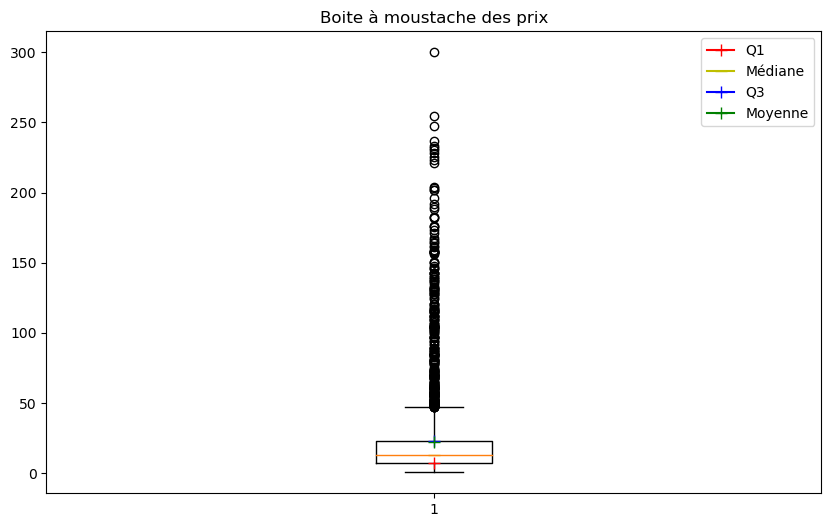

In [26]:
# Tracer un boxplot
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(prod['price'], vert=True)

# Calculer les quartiles, la médiane et la moyenne
q1, median, q3 = np.percentile(prod['price'], [25, 50, 75])
mean = np.mean(prod['price'])

# Ajouter des marqueurs pour les quartiles, la médiane et la moyenne
ax.plot(1, q1, marker='+', markersize=8, color='r', label='Q1')
ax.plot(1, median, marker='_', markersize=8, color='y', label='Médiane')
ax.plot(1, q3, marker='+', markersize=8, color='b', label='Q3')
ax.plot(1, mean, marker='+', markersize=8, color='g', label='Moyenne')

# Ajouter des légendes et un titre

ax.legend()
plt.title('Boite à moustache des prix')
plt.show()

In [27]:
def detect_outliers_IQR(data):
    """
    Detecte les valeurs aberrantes selon la methode IQR.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# application de la fonction sur la colonne 'price'
outliers = detect_outliers_IQR(prod['price'])
num_outliers = len(outliers)
print('Nombre de valeurs aberrantes selon la methode des Interquartiles : ', num_outliers)

Nombre de valeurs aberrantes selon la methode des Interquartiles :  302


In [28]:
min(outliers)

46.99

In [29]:
max(outliers)

300.0

In [30]:
# Extraction des valeurs uniques de la colonne 'categ'
prod['categ'].unique()

array([0, 1, 2], dtype=int64)

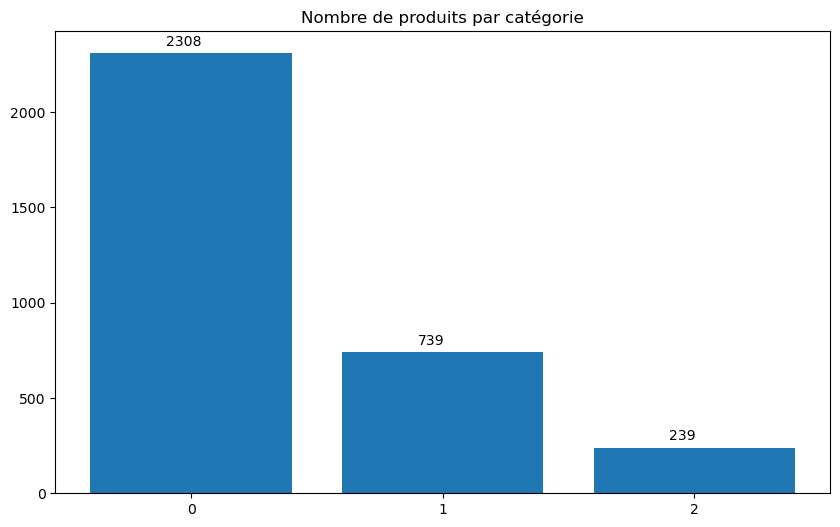

In [31]:
# Représentation graphique du nombre de produits par catégorie 
graph = prod.groupby('categ')[['id_prod']].count().reset_index()

# Mise en forme Graphique
plt.figure(figsize=(10,6))
plt.bar(x=graph['categ'], height=graph['id_prod'])
plt.xticks(np.arange(min(graph['categ']),max(graph['categ'])+1, step=1))
plt.title('Nombre de produits par catégorie')

values=graph['id_prod'].to_list()
for i in range(3):
    plt.text(i-0.1, values[i]+40, values[i])

plt.show()

In [32]:
prod

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


## 2.3. Données Transactions
↺ [Sommaire](#Sommaire)

In [33]:
tran = pd.read_csv('C:\\Users\\Dell\\Desktop\\data_analyst_path\\Projet06_Analysez les ventes d\'une librairie avec R ou Python\\Mission\\DAN-P6-donnees\\transactions.csv')
tran

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [34]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [35]:
# Affichage des doublons
tran_doub = tran.loc[tran.duplicated()==True]
tran_doub

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [36]:
# Suppresssion des entrées test
tran = tran.loc[~tran["date"].str.contains("test")]
tran

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [37]:
# Vérification des doublons
tran.duplicated().sum()

0

In [38]:
# Conversion du type date (object) vers un format DateTime (datetime64[ns]) 
tran['date'] = pd.to_datetime(tran['date'], errors = "coerce")
tran

C:\Users\Dell\AppData\Local\Temp\ipykernel_8636\3725320495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran['date'] = pd.to_datetime(tran['date'], errors = "coerce")


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [39]:
# Vérification des formats des colonnes
tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [40]:
#Création de nouvelles colonnes 'année', 'mois' et 'jour'
tran = tran.assign(Jours = tran['date'].dt.strftime('%Y-%m-%d'), 
                   Mois = tran['date'].dt.strftime('%Y-%m'), 
                   Année = tran['date'].dt.strftime('%Y'))
tran

,id_prod,date,session_id,client_id,Jours,Mois,Année
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022-05,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022-02,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022-06,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021-06,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023-01,2023
...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022-01,2022
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022-03,2022
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022-12,2022
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021-07,2021


In [41]:
# Affichage des différentes valeurs de la variable année
df = tran['Année'].value_counts().to_frame().reset_index()
df['% des transactions'] = round(df['Année']/df['Année'].sum(),3)*100
df = df.rename(columns={'index':'Année', 'Année':'Nb de transactions', '% des transactions':'Répartition en %'})
df

,Année,Nb de transactions,Répartition en %
0,2022,346500,51.0
1,2021,278335,41.0
2,2023,54497,8.0


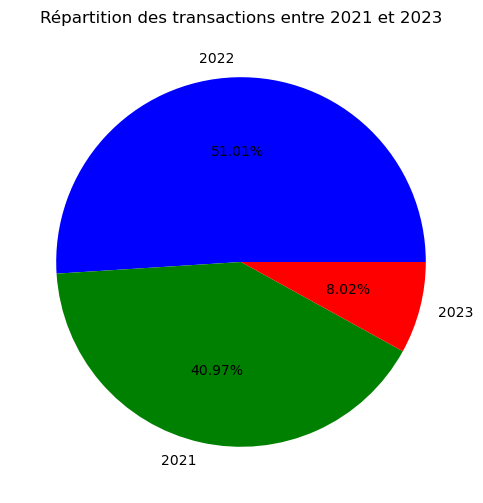

In [42]:
# Représentation graphique de la répartition des transactions
plt.figure(figsize=(10,6))
colors = ['blue','green', 'red']
labels = ('2022', '2021','2023')
plt.pie(df['Nb de transactions'], labels=labels, colors=colors, explode=(0, 0, 0), autopct='%.2f%%')
plt.title('Répartition des transactions entre 2021 et 2023')
plt.show()

In [43]:
tran

,id_prod,date,session_id,client_id,Jours,Mois,Année
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022-05,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022-02,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022-06,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021-06,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023-01,2023
...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022-01,2022
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022-03,2022
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022-12,2022
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021-07,2021


# 3. Jointure des données
↺ [Sommaire](#Sommaire)

Pour récupérer les informations du **'produit'** et du **'client'** de chaque **transaction**, On joint les trois fichiers.

In [44]:
# Jointure à gauche selectionnant toutes les données des transactions
Data = pd.merge(tran,prod, on='id_prod', how='left' )
Data = pd.merge(Data,cust, on='client_id', how='left')
Data

,id_prod,date,session_id,client_id,Jours,Mois,Année,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022-05,2022,4.18,0.0,f,1986,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022-02,2022,15.99,1.0,m,1988,35
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022-06,2022,7.99,0.0,f,1968,55
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021-06,2021,69.99,2.0,m,2000,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023-01,2023,4.99,0.0,m,1980,43
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022-01,2022,12.99,0.0,f,1951,72
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022-03,2022,10.99,1.0,f,1977,46
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022-12,2022,12.99,0.0,f,1988,35
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021-07,2021,4.98,0.0,m,1986,37


In [45]:
dat_comp = Data[['id_prod', 'price', 'categ','date', 'Jours','Mois','Année','session_id','client_id','sex','birth','age']]
dat_comp

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,2022-05-20,2022-05,2022,s_211425,c_103,f,1986,37
1,1_251,15.99,1.0,2022-02-02 07:55:19.149409,2022-02-02,2022-02,2022,s_158752,c_8534,m,1988,35
2,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,2022-06-18,2022-06,2022,s_225667,c_6714,f,1968,55
3,2_209,69.99,2.0,2021-06-24 04:19:29.835891,2021-06-24,2021-06,2021,s_52962,c_6941,m,2000,23
4,0_1509,4.99,0.0,2023-01-11 08:22:08.194479,2023-01-11,2023-01,2023,s_325227,c_4232,m,1980,43
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,12.99,0.0,2022-01-15 13:05:06.246925,2022-01-15,2022-01,2022,s_150195,c_8489,f,1951,72
679328,1_639,10.99,1.0,2022-03-19 16:03:23.429229,2022-03-19,2022-03,2022,s_181434,c_4370,f,1977,46
679329,0_1425,12.99,0.0,2022-12-20 04:33:37.584749,2022-12-20,2022-12,2022,s_314704,c_304,f,1988,35
679330,0_1994,4.98,0.0,2021-07-16 20:36:35.350579,2021-07-16,2021-07,2021,s_63204,c_2227,m,1986,37


In [46]:
dat_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   Jours       679332 non-null  object        
 5   Mois        679332 non-null  object        
 6   Année       679332 non-null  object        
 7   session_id  679332 non-null  object        
 8   client_id   679332 non-null  object        
 9   sex         679332 non-null  object        
 10  birth       679332 non-null  int64         
 11  age         679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 67.4+ MB


In [47]:
# Recherche des valeurs nulles dans la table de jointure
dat_comp.isnull().sum()

id_prod         0
price         221
categ         221
date            0
Jours           0
Mois            0
Année           0
session_id      0
client_id       0
sex             0
birth           0
age             0
dtype: int64

In [48]:
# extraction des données ou les valeurs de la colonne 'price' sont nulles
dat_comp.loc[dat_comp['price'].isnull()]

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
2633,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,2022-09-23,2022-09,2022,s_272266,c_4746,m,1940,83
10103,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,2022-07-23,2022-07,2022,s_242482,c_6713,f,1963,60
11723,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,2022-12-03,2022-12,2022,s_306338,c_5108,m,1978,45
15670,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,2021-08-16,2021-08,2021,s_76493,c_1391,m,1991,32
16372,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,2022-07-16,2022-07,2022,s_239078,c_7954,m,1973,50
...,...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,2021-08-25,2021-08,2021,s_80395,c_131,m,1981,42
670484,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,2022-03-06,2022-03,2022,s_175311,c_4167,f,1979,44
671088,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,2022-05-16,2022-05,2022,s_209381,c_4453,m,1981,42
675480,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,2022-02-11,2022-02,2022,s_163405,c_1098,m,1986,37


In [49]:
# extraction des données ou les valeurs de la colonne 'categ' sont nulles
dat_comp.loc[dat_comp['categ'].isnull()]

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
2633,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,2022-09-23,2022-09,2022,s_272266,c_4746,m,1940,83
10103,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,2022-07-23,2022-07,2022,s_242482,c_6713,f,1963,60
11723,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,2022-12-03,2022-12,2022,s_306338,c_5108,m,1978,45
15670,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,2021-08-16,2021-08,2021,s_76493,c_1391,m,1991,32
16372,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,2022-07-16,2022-07,2022,s_239078,c_7954,m,1973,50
...,...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,2021-08-25,2021-08,2021,s_80395,c_131,m,1981,42
670484,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,2022-03-06,2022-03,2022,s_175311,c_4167,f,1979,44
671088,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,2022-05-16,2022-05,2022,s_209381,c_4453,m,1981,42
675480,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,2022-02-11,2022-02,2022,s_163405,c_1098,m,1986,37


In [50]:
# Comparaison des deux dataframes des valeurs nulles
dat_comp.loc[dat_comp['categ'].isnull()].equals(dat_comp.loc[dat_comp['price'].isnull()])

True

In [51]:
# détection des valeurs des id_prod pour le data frame des valeurs nulles
dat_comp.loc[dat_comp['price'].isnull(),:]['id_prod'].unique()

array(['0_2245'], dtype=object)

In [52]:
prod[prod['id_prod'] == '0_2245']

,id_prod,price,categ


In [53]:
dat_comp = dat_comp.drop(dat_comp.index[dat_comp['id_prod'] == '0_2245'])
dat_comp

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,2022-05-20,2022-05,2022,s_211425,c_103,f,1986,37
1,1_251,15.99,1.0,2022-02-02 07:55:19.149409,2022-02-02,2022-02,2022,s_158752,c_8534,m,1988,35
2,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,2022-06-18,2022-06,2022,s_225667,c_6714,f,1968,55
3,2_209,69.99,2.0,2021-06-24 04:19:29.835891,2021-06-24,2021-06,2021,s_52962,c_6941,m,2000,23
4,0_1509,4.99,0.0,2023-01-11 08:22:08.194479,2023-01-11,2023-01,2023,s_325227,c_4232,m,1980,43
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,12.99,0.0,2022-01-15 13:05:06.246925,2022-01-15,2022-01,2022,s_150195,c_8489,f,1951,72
679328,1_639,10.99,1.0,2022-03-19 16:03:23.429229,2022-03-19,2022-03,2022,s_181434,c_4370,f,1977,46
679329,0_1425,12.99,0.0,2022-12-20 04:33:37.584749,2022-12-20,2022-12,2022,s_314704,c_304,f,1988,35
679330,0_1994,4.98,0.0,2021-07-16 20:36:35.350579,2021-07-16,2021-07,2021,s_63204,c_2227,m,1986,37


In [54]:
# Recherche de valeurs nulles sur la table de jointure néttoyée
dat_comp.isnull().sum()

id_prod       0
price         0
categ         0
date          0
Jours         0
Mois          0
Année         0
session_id    0
client_id     0
sex           0
birth         0
age           0
dtype: int64

In [55]:
dat_comp['price'].max()

300.0

In [56]:
# Affichage des produits les plus chers
dat_comp[dat_comp['price']== 300]

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
36594,2_2,300.0,2.0,2022-12-07 06:52:26.810576,2022-12-07,2022-12,2022,s_308301,c_4958,m,1999,24
76793,2_2,300.0,2.0,2021-06-12 08:44:00.882917,2021-06-12,2021-06,2021,s_47558,c_5237,m,1999,24
91228,2_2,300.0,2.0,2022-08-12 08:44:00.882917,2022-08-12,2022-08,2022,s_252144,c_5237,m,1999,24
143001,2_2,300.0,2.0,2021-05-02 18:34:47.753888,2021-05-02,2021-05,2021,s_28956,c_2329,f,1996,27
143185,2_2,300.0,2.0,2021-06-06 23:14:33.815188,2021-06-06,2021-06,2021,s_45088,c_2467,f,1997,26
181540,2_2,300.0,2.0,2021-12-07 06:52:26.810576,2021-12-07,2021-12,2021,s_130658,c_4958,m,1999,24
319823,2_2,300.0,2.0,2022-03-28 21:24:28.442508,2022-03-28,2022-03,2022,s_185980,c_659,f,2001,22
341315,2_2,300.0,2.0,2022-02-28 21:24:28.442508,2022-02-28,2022-02,2022,s_172373,c_659,f,2001,22
350936,2_2,300.0,2.0,2022-06-07 06:52:26.810576,2022-06-07,2022-06,2022,s_220074,c_4958,m,1999,24
354280,2_2,300.0,2.0,2022-12-06 23:14:33.815188,2022-12-06,2022-12,2022,s_308128,c_2467,f,1997,26


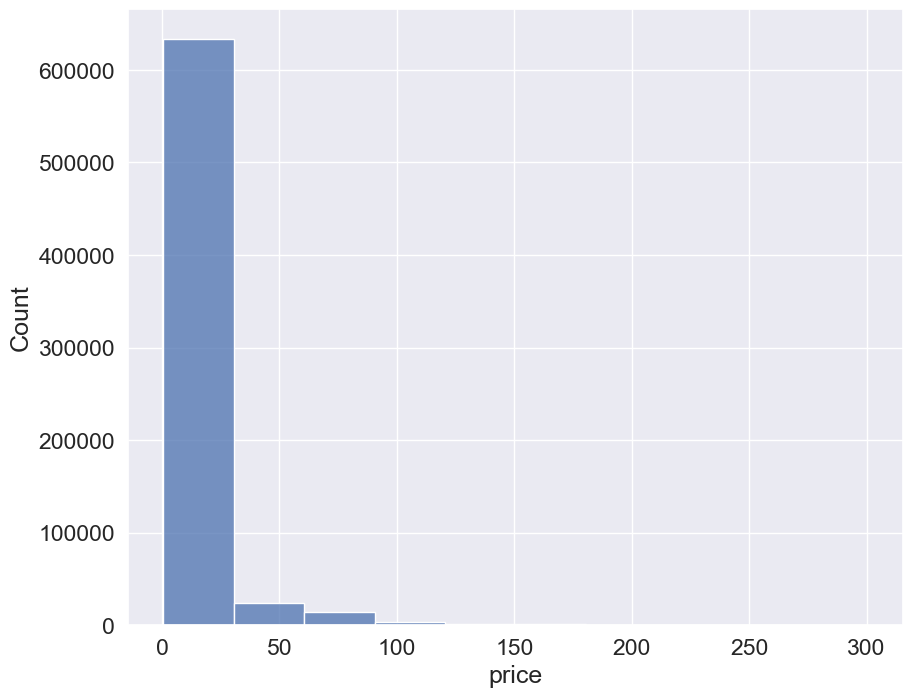

In [57]:
# Répartition graphique des prix de produits
plt.rcParams['figure.figsize'] = (10,8)

sns.set(font_scale=1.5)
sns.histplot(data=dat_comp, x='price',binwidth=30)

# Récupération des rectangles représentant les barres de l'histogramme
rects = ax.patches

# Ajout des étiquettes représentant les valeurs maximales sur chaque barre
for rect in rects:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.text(x, y, int(y), ha='center', va='top')

# Affichage de la figure
plt.show()

In [58]:
# Classementdes transactions par date
dat_comp.sort_values(by='date')

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
480501,0_1259,11.99,0.0,2021-03-01 00:01:07.843138,2021-03-01,2021-03,2021,s_1,c_329,f,1967,56
428350,0_1390,19.37,0.0,2021-03-01 00:02:26.047414,2021-03-01,2021-03,2021,s_2,c_664,m,1960,63
462563,0_1352,4.50,0.0,2021-03-01 00:02:38.311413,2021-03-01,2021-03,2021,s_3,c_580,m,1988,35
488153,0_1458,6.55,0.0,2021-03-01 00:04:54.559692,2021-03-01,2021-03,2021,s_4,c_7912,f,1989,34
438944,0_1358,16.49,0.0,2021-03-01 00:05:18.801198,2021-03-01,2021-03,2021,s_5,c_2033,f,1956,67
...,...,...,...,...,...,...,...,...,...,...,...,...
184602,1_508,21.92,1.0,2023-02-28 23:49:03.148402,2023-02-28,2023-02,2023,s_348444,c_3573,f,1996,27
588008,2_37,48.99,2.0,2023-02-28 23:51:29.318531,2023-02-28,2023-02,2023,s_348445,c_50,f,1994,29
130140,1_695,26.99,1.0,2023-02-28 23:53:18.929676,2023-02-28,2023-02,2023,s_348446,c_488,f,1985,38
550293,0_1547,8.99,0.0,2023-02-28 23:58:00.107815,2023-02-28,2023-02,2023,s_348447,c_4848,m,1953,70


# 4. Chiffre d'affaire

## 4.1. Chiffre d'affaire total
↺ [Sommaire](#Sommaire)

In [59]:
#Affichage de la table des données
dat_comp

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,2022-05-20,2022-05,2022,s_211425,c_103,f,1986,37
1,1_251,15.99,1.0,2022-02-02 07:55:19.149409,2022-02-02,2022-02,2022,s_158752,c_8534,m,1988,35
2,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,2022-06-18,2022-06,2022,s_225667,c_6714,f,1968,55
3,2_209,69.99,2.0,2021-06-24 04:19:29.835891,2021-06-24,2021-06,2021,s_52962,c_6941,m,2000,23
4,0_1509,4.99,0.0,2023-01-11 08:22:08.194479,2023-01-11,2023-01,2023,s_325227,c_4232,m,1980,43
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,12.99,0.0,2022-01-15 13:05:06.246925,2022-01-15,2022-01,2022,s_150195,c_8489,f,1951,72
679328,1_639,10.99,1.0,2022-03-19 16:03:23.429229,2022-03-19,2022-03,2022,s_181434,c_4370,f,1977,46
679329,0_1425,12.99,0.0,2022-12-20 04:33:37.584749,2022-12-20,2022-12,2022,s_314704,c_304,f,1988,35
679330,0_1994,4.98,0.0,2021-07-16 20:36:35.350579,2021-07-16,2021-07,2021,s_63204,c_2227,m,1986,37


In [60]:
# Calcul du chifre d'affaire total
print('Le chiffre d\'Affaire Total est de',dat_comp['price'].sum(),'€')

Le chiffre d'Affaire Total est de 11853728.68 €


## 4.2. Chiffre d'affaire journalier
↺ [Sommaire](#Sommaire)

In [61]:
# Calcul du chiffre d'affaire journalier
dat_compd = dat_comp.groupby('Jours').sum()
dat_compd = dat_compd[['price']].reset_index()
dat_compd

C:\Users\Dell\AppData\Local\Temp\ipykernel_8636\3094209898.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dat_compd = dat_comp.groupby('Jours').sum()


,Jours,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


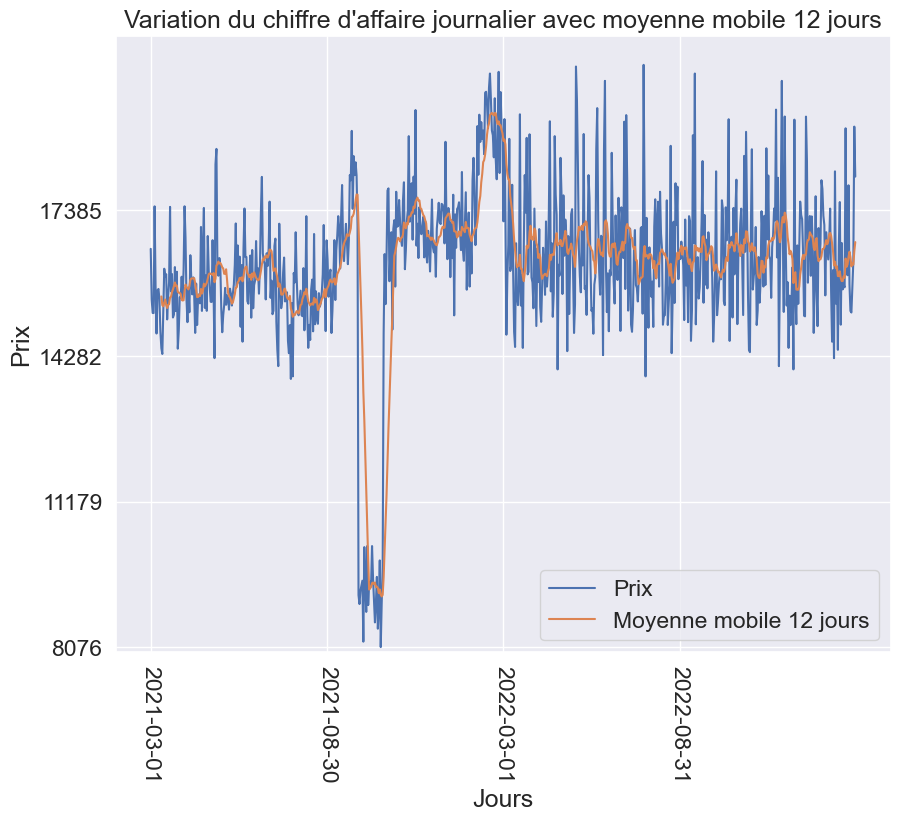

In [62]:
# Calculer la moyenne mobile sur 12 jours
dat_compd['moyenne_mobile_12'] = dat_compd['price'].rolling(window=12).mean()

# Représentation graphique
plt.plot(dat_compd['Jours'], dat_compd['price'], label='Prix')
plt.plot(dat_compd['Jours'], dat_compd['moyenne_mobile_12'], label='Moyenne mobile 12 jours')

# Définition des positions des graduations sur l'axe des x en fonction de la longueur de la série
x_ticks = np.arange(0, len(dat_compd['Jours']), len(dat_compd['Jours'])*0.25)

# définition des positions des graduations sur l'axe des y en fonction de la plage de données et de l'intervalle souhaité
y_min = dat_compd[['price', 'moyenne_mobile_12']].min().min()
y_max = dat_compd[['price', 'moyenne_mobile_12']].max().max()
y_ticks = np.arange(y_min, y_max, (y_max - y_min)*0.25)

plt.xticks(x_ticks, rotation=-90)
plt.yticks(y_ticks)

# Limite inférieur des y
plt.ylim(ymin=y_min - 100)

# Ajout des noms des axes et un titre
plt.xlabel('Jours')
plt.ylabel('Prix')
plt.title('Variation du chiffre d\'affaire journalier avec moyenne mobile 12 jours')

# Visualisation du raphique
plt.legend()


## 4.3. Chiffre d'affaire mensuel
↺ [Sommaire](#Sommaire)

In [63]:
# Calcul du chiffre d'affaire mensuelle
dat_compm = dat_comp.groupby('Mois')[['price']].sum()
dat_compm = dat_compm.reset_index()
dat_compm

,Mois,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


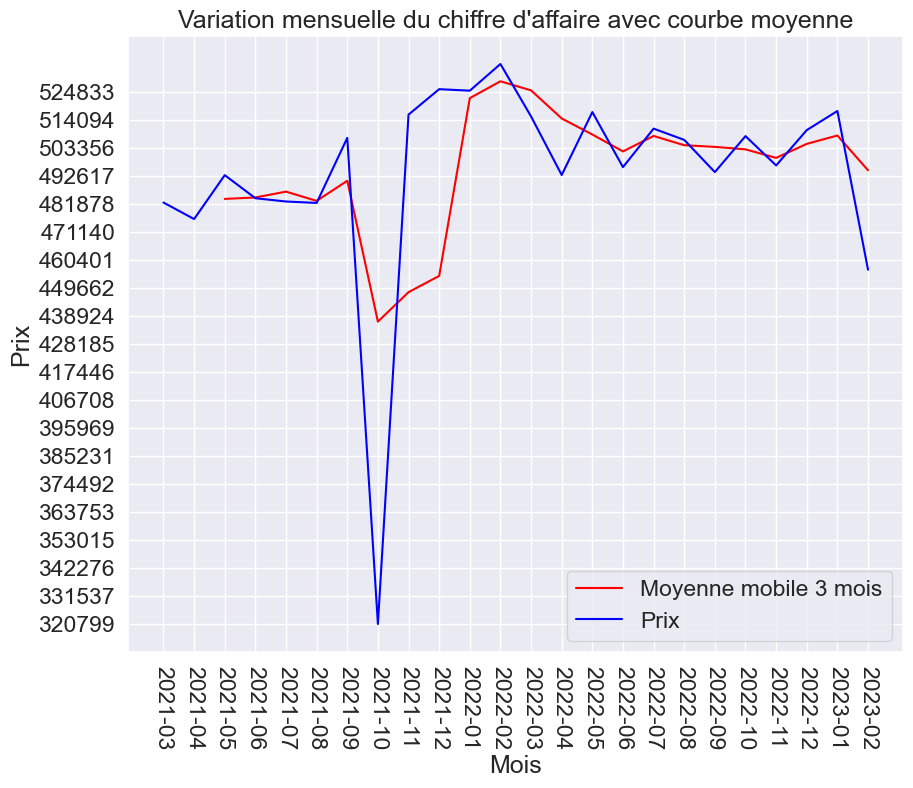

In [64]:
# Calculer la courbe moyenne mobile sur 3 mois
dat_compm['moyenne_mobile_3'] = dat_compm['price'].rolling(window=3).mean()

# Représentation graphique de la moyenne mobile
plt.plot(dat_compm['Mois'], dat_compm['moyenne_mobile_3'], label='Moyenne mobile 3 mois', color='red')

# Représentation graphique du prix
plt.plot(dat_compm['Mois'], dat_compm['price'], label='Prix', color='blue')

# Set the x-axis tick positions based on the length of the series
x_ticksm = np.arange(0, len(dat_compm['Mois']))

# Set the y-axis tick positions based on the data range and desired interval
y_minm = dat_compm[['price']].min().min()
y_maxm = dat_compm[['price']].max().max()
y_ticksm = np.arange(y_minm, y_maxm, (y_maxm - y_minm) * 0.05)

# Affichage des ticks
plt.xticks(x_ticksm, rotation=-90)
plt.yticks(y_ticksm)

# Affichage du titre et noms des axes
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.title('Variation mensuelle du chiffre d\'affaire avec courbe moyenne')

# Add a legend
plt.legend()

# Affichage du graphe
plt.show()

## 4.4. Chiffre d'affaires par mois et par catégories
↺ [Sommaire](#Sommaire)

In [65]:
# Calcul des totaux de chiffre d'affaire pour chaque catégorie
print('Le chiffre d\'affaire total pour la catégorie 0 est :',dat_comp[dat_comp['categ']==0.0]['price'].sum(),'€, soit:',round(dat_comp[dat_comp['categ']==0.0]['price'].sum()*100/dat_comp['price'].sum(),2),'% du chiffre totale \n')
print('Le chiffre d\'affaire total pour la catégorie 1 est :',dat_comp[dat_comp['categ']==1.0]['price'].sum(),'€, soit:',round(dat_comp[dat_comp['categ']==1.0]['price'].sum()*100/dat_comp['price'].sum(),2),'% du chiffre totale \n')
print('Le chiffre d\'affaire total pour la catégorie 2 est :',dat_comp[dat_comp['categ']==2.0]['price'].sum(),'€, soit:',round(dat_comp[dat_comp['categ']==2.0]['price'].sum()*100/dat_comp['price'].sum(),2),'% du chiffre totale')

Le chiffre d'affaire total pour la catégorie 0 est : 4419730.970000001 €, soit: 37.29 % du chiffre totale 

Le chiffre d'affaire total pour la catégorie 1 est : 4653722.69 €, soit: 39.26 % du chiffre totale 

Le chiffre d'affaire total pour la catégorie 2 est : 2780275.0200000005 €, soit: 23.45 % du chiffre totale


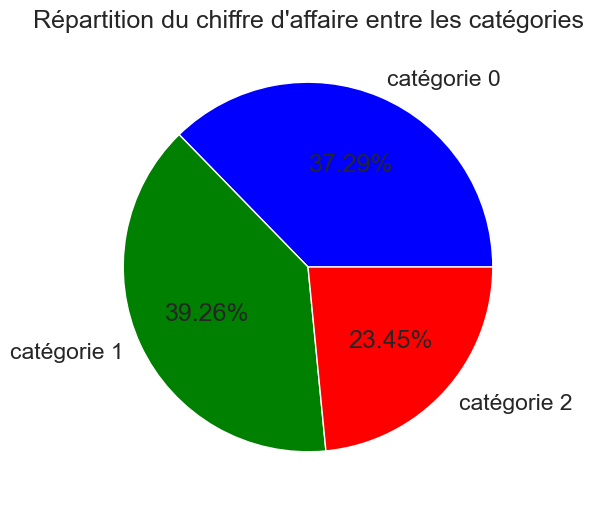

In [66]:
# Représentation graphique boxplot
plt.figure(figsize=(10,6))
pie=[dat_comp[dat_comp['categ']==0.0]['price'].sum(), dat_comp[dat_comp['categ']==1.0]['price'].sum(), dat_comp[dat_comp['categ']==2.0]['price'].sum()]
colors = ['blue','green', 'red']
labels = ('catégorie 0', 'catégorie 1','catégorie 2')
plt.pie(pie, labels=labels, colors=colors, explode=(0, 0, 0), autopct='%.2f%%')
plt.title('Répartition du chiffre d\'affaire entre les catégories')
plt.show()


In [67]:
#Création d'un dataframe qui pour chaque mois indique la somme du chiffre d'affaire par catégorie
CA_month_categ = dat_comp[['price','categ','Mois']].groupby(['Mois','categ']).sum().reset_index()
CA_month_categ

,Mois,categ,price
0,2021-03,0.0,193629.17
1,2021-03,1.0,186974.17
2,2021-03,2.0,101837.27
3,2021-04,0.0,205222.46
4,2021-04,1.0,156138.35
...,...,...,...
67,2023-01,1.0,210104.41
68,2023-01,2.0,126153.08
69,2023-02,0.0,162457.00
70,2023-02,1.0,180347.24


In [68]:
# Transformation du DF en format wide (1 colonne par catégorie) pour faciliter la creation des graphiques
CA_month_categ2=CA_month_categ.pivot(index='Mois', columns='categ', values='price').reset_index()
CA_month_categ2.reset_index()
CA_month_categ2

categ,Mois,0.0,1.0,2.0
0,2021-03,193629.17,186974.17,101837.27
1,2021-04,205222.46,156138.35,114748.49
2,2021-05,196186.72,165893.40,130863.35
3,2021-06,167943.15,189162.04,126983.37
4,2021-07,144750.79,188523.27,149561.34
5,2021-08,167737.62,162991.38,151555.79
6,2021-09,246353.91,190613.78,70272.99
7,2021-10,199250.83,33762.32,87785.59
8,2021-11,155909.56,252910.39,107347.78
9,2021-12,206036.24,251026.75,68854.29


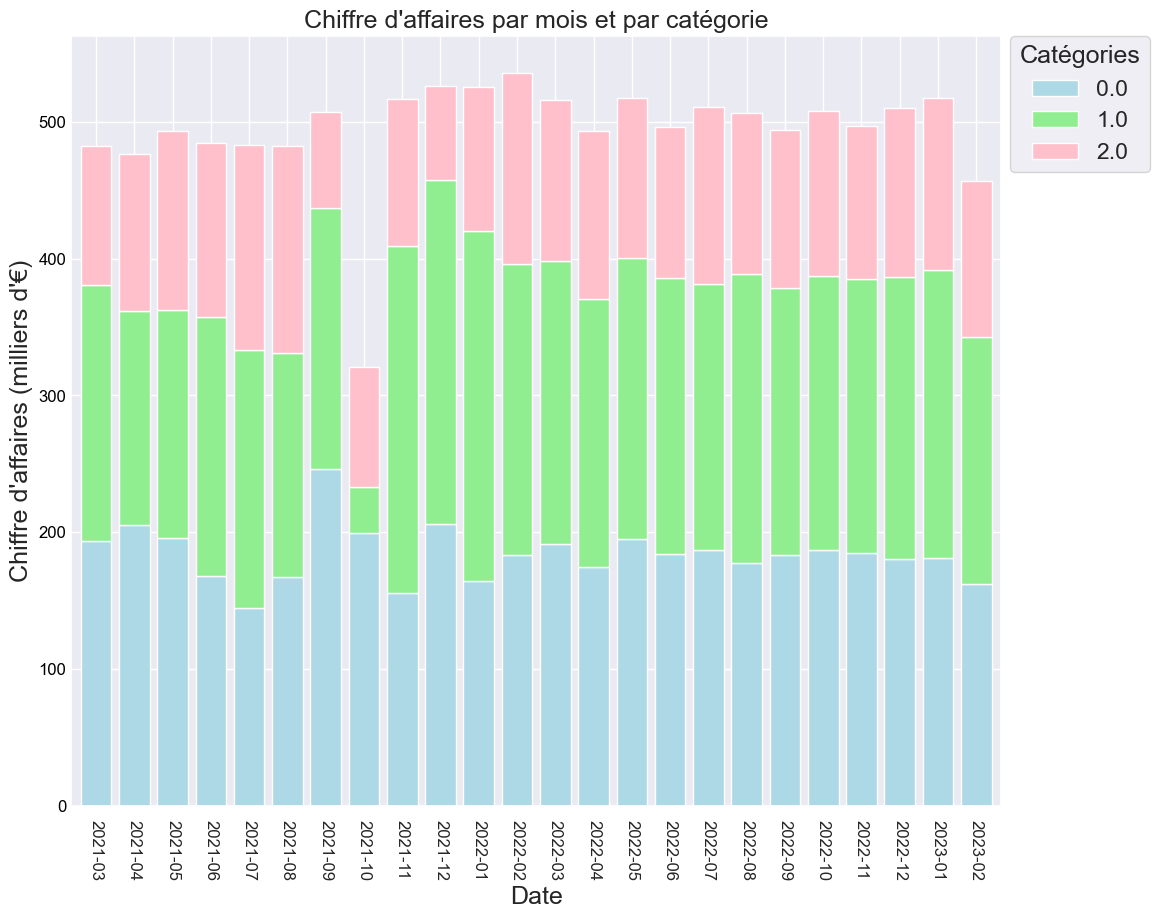

In [69]:
# Configuration de la taille de la police pour l'ensemble du graphique
plt.rcParams.update({'font.size': 14})
# Configuration de la taille de la figure
plt.rcParams["figure.figsize"] = (12, 10)
# Définition des couleurs des barres
colors = ['lightblue', 'lightgreen', 'Pink', '#C70039', '#900C3F']
# Création du graphique
ax = ((CA_month_categ2.set_index('Mois')) / 1000).plot(kind='bar', stacked=True, width=.8, color=colors)
# Configuration des étiquettes des axes et du titre
ax.set_xlabel("Date")
ax.set_ylabel("Chiffre d'affaires (milliers d'€)")
plt.title("Chiffre d'affaires par mois et par catégorie")
# Configuration de l'emplacement et du titre de la légende
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title='Catégories')
# Configuration des paramètres des axes
plt.xticks(rotation=-90, ha='center')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12, color = 'black', length = 6, width=1)
plt.tick_params(axis = 'y', which = 'major', labelcolor = 'black', length = 0)
# Affichage du graphique
plt.show()

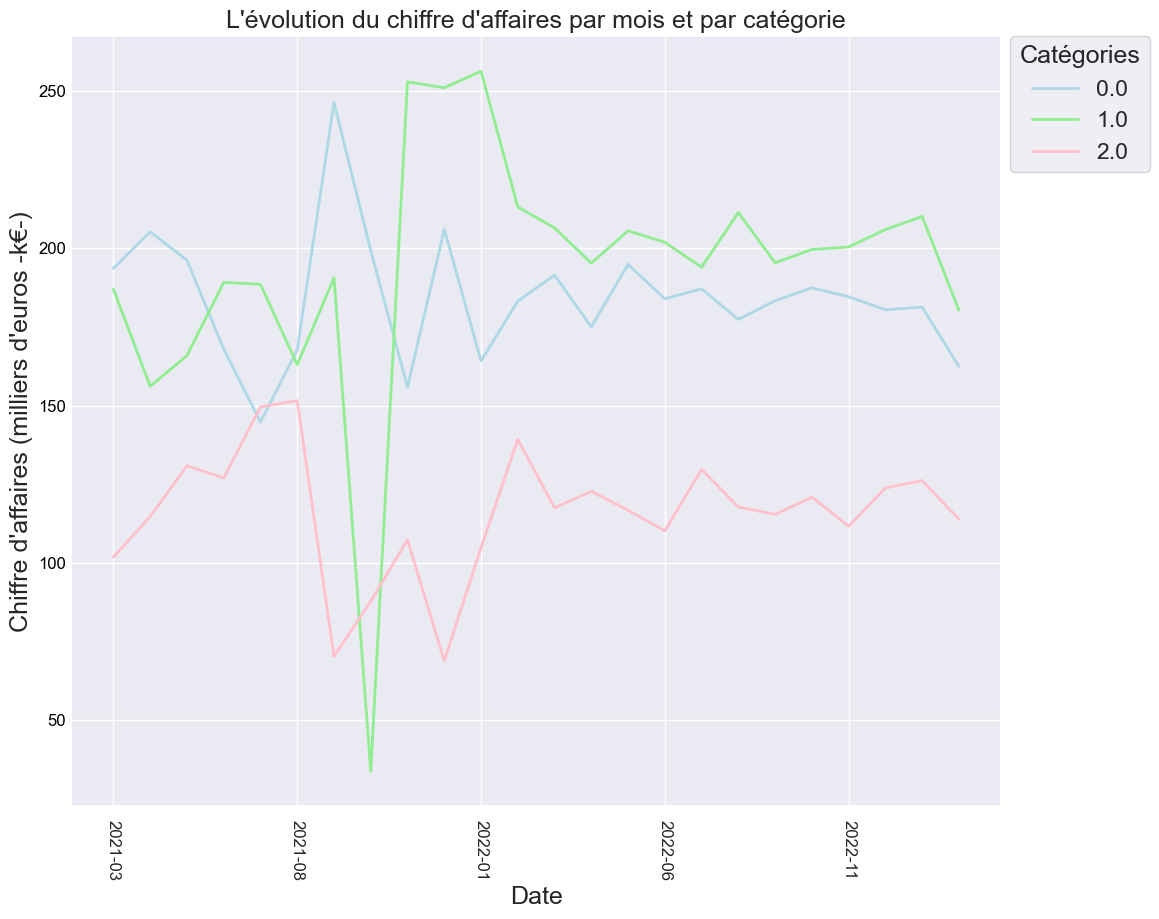

In [70]:
# Configuration de la taille de la police pour l'ensemble du graphique
plt.rcParams.update({'font.size': 14})
# Configuration de la taille de la figure
plt.rcParams["figure.figsize"] = (12, 10)
# Définition des couleurs des barres
colors = ['lightblue', 'lightgreen', 'Pink', '#C70039', '#900C3F']
# Création du graphique
ax = ((CA_month_categ2.set_index('Mois')) / 1000).plot(kind='line', stacked=False, linewidth=2, color=colors)
# Configuration des étiquettes des axes et du titre
ax.set_xlabel("Date")
ax.set_ylabel("Chiffre d'affaires (milliers d'euros -k€-)")
plt.title("L'évolution du chiffre d'affaires par mois et par catégorie")
# Configuration de l'emplacement et du titre de la légende
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title='Catégories')
# Configuration des paramètres des axes
plt.xticks(rotation=-90, ha='center')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12, color = 'black', length = 6, width=1)
plt.tick_params(axis = 'y', which = 'major', labelcolor = 'black', length = 0)
# Affichage du graphique
plt.show()

### Détection du problème au mois d'octobre 2021

In [71]:
# Selection des données d'octobre 2021 
dat_comp['Mois'] = pd.to_datetime(dat_comp['Mois']).dt.strftime('%Y-%m')
dat_oct = dat_comp[dat_comp['Mois'] == '2021-10']
dat_oct

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age
68,0_1409,4.99,0.0,2021-10-02 17:39:26.919537,2021-10-02,2021-10,2021,s_99013,c_5725,m,1975,48
71,0_1247,15.99,0.0,2021-10-03 16:05:12.544172,2021-10-03,2021-10,2021,s_99443,c_3394,f,1978,45
80,0_1272,17.01,0.0,2021-10-13 14:35:01.163737,2021-10-13,2021-10,2021,s_104207,c_8534,m,1988,35
86,0_1102,4.63,0.0,2021-10-24 13:25:39.888945,2021-10-24,2021-10,2021,s_109442,c_1609,m,1980,43
93,0_1079,5.99,0.0,2021-10-05 21:57:27.673800,2021-10-05,2021-10,2021,s_100557,c_7918,m,1987,36
...,...,...,...,...,...,...,...,...,...,...,...,...
679222,0_1418,8.57,0.0,2021-10-22 01:12:51.848429,2021-10-22,2021-10,2021,s_108264,c_7213,m,1979,44
679240,0_1391,7.99,0.0,2021-10-26 04:40:29.252116,2021-10-26,2021-10,2021,s_110243,c_7878,m,1989,34
679290,0_1609,18.99,0.0,2021-10-15 16:58:58.818380,2021-10-15,2021-10,2021,s_105230,c_6714,f,1968,55
679315,0_1635,16.99,0.0,2021-10-01 23:19:52.888190,2021-10-01,2021-10,2021,s_98649,c_1061,m,1991,32


In [72]:
# Créer un dataframe vide avec toutes les dates du mois d'octobre categorie 0
dates = pd.date_range(start='2021-10-01', end='2021-10-31', freq='D')
df_dates = pd.DataFrame({'Jours': dates})
# Effectuer la somme des valeurs par catégorie pour le mois d'octobre categorie 0
mois_oct_0 = dat_comp[(dat_comp['Jours'] <= '2021-10-31') & (dat_comp['Jours'] >= '2021-10-01') & (dat_comp['categ'] == 0)]
mois_oct_0 = mois_oct_0.groupby('Jours').sum().reset_index()
# Convertir la colonne 'Jours' en type de données date dans le dataframe 'mois_oct_0'
mois_oct_0['Jours'] = pd.to_datetime(mois_oct_0['Jours'])
# Fusionner le dataframe avec toutes les dates du mois d'octobre avec la table des sommes par catégorie pour le mois d'octobre
mois_oct_0 = pd.merge(df_dates,mois_oct_0, on='Jours',how='left')
# Remplacer les valeurs manquantes par 0 dans la colonne 'price'
mois_oct_0 = mois_oct_0.fillna(0)
mois_oct_0 = mois_oct_0[['Jours','price']]
mois_oct_0

C:\Users\Dell\AppData\Local\Temp\ipykernel_8636\2241242096.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mois_oct_0 = mois_oct_0.groupby('Jours').sum().reset_index()


,Jours,price
0,2021-10-01,6950.50
1,2021-10-02,7141.01
2,2021-10-03,6786.57
3,2021-10-04,6533.60
4,2021-10-05,6357.91
5,2021-10-06,7546.58
6,2021-10-07,6404.01
7,2021-10-08,7069.53
8,2021-10-09,6808.69
9,2021-10-10,6490.98


In [73]:
# Créer un dataframe vide avec toutes les dates du mois d'octobre
dates = pd.date_range(start='2021-10-01', end='2021-10-31', freq='D')
df_dates = pd.DataFrame({'Jours': dates})
# Effectuer la somme des valeurs par catégorie pour le mois d'octobre
mois_oct = dat_comp[(dat_comp['Jours'] <= '2021-10-31') & (dat_comp['Jours'] >= '2021-10-01') & (dat_comp['categ'] == 1)]
mois_oct = mois_oct.groupby('Jours').sum().reset_index()
# Convertir la colonne 'Jours' en type de données date dans le dataframe 'mois_oct'
mois_oct['Jours'] = pd.to_datetime(mois_oct['Jours'])
# Fusionner le dataframe avec toutes les dates du mois d'octobre avec la table des sommes par catégorie pour le mois d'octobre
mois_oct = pd.merge(df_dates,mois_oct, on='Jours',how='left')
# Remplacer les valeurs manquantes par 0 dans la colonne 'price'
mois_oct = mois_oct.fillna(0)
mois_oct = mois_oct[['Jours','price']]
mois_oct

C:\Users\Dell\AppData\Local\Temp\ipykernel_8636\3956788585.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mois_oct = mois_oct.groupby('Jours').sum().reset_index()


,Jours,price
0,2021-10-01,7003.79
1,2021-10-02,0.00
2,2021-10-03,0.00
3,2021-10-04,0.00
4,2021-10-05,0.00
5,2021-10-06,0.00
6,2021-10-07,0.00
7,2021-10-08,0.00
8,2021-10-09,0.00
9,2021-10-10,0.00


In [74]:
# Créer un dataframe vide avec toutes les dates du mois d'octobre categorie 2
dates = pd.date_range(start='2021-10-01', end='2021-10-31', freq='D')
df_dates = pd.DataFrame({'Jours': dates})
# Effectuer la somme des valeurs par catégorie pour le mois d'octobre categorie 2
mois_oct_2 = dat_comp[(dat_comp['Jours'] <= '2021-10-31') & (dat_comp['Jours'] >= '2021-10-01') & (dat_comp['categ'] == 2)]
mois_oct_2 = mois_oct_2.groupby('Jours').sum().reset_index()
# Convertir la colonne 'Jours' en type de données date dans le dataframe 'mois_oct_2'
mois_oct_2['Jours'] = pd.to_datetime(mois_oct_2['Jours'])
# Fusionner le dataframe avec toutes les dates du mois d'octobre avec la table des sommes par catégorie pour le mois d'octobre categorie 2
mois_oct_2 = pd.merge(df_dates,mois_oct_2, on='Jours',how='left')
# Remplacer les valeurs manquantes par 0 dans la colonne 'price'
mois_oct_2 = mois_oct_2.fillna(0)
mois_oct_2 = mois_oct_2[['Jours','price']]
mois_oct_2

C:\Users\Dell\AppData\Local\Temp\ipykernel_8636\3287223680.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mois_oct_2 = mois_oct_2.groupby('Jours').sum().reset_index()


,Jours,price
0,2021-10-01,3104.05
1,2021-10-02,2041.12
2,2021-10-03,2206.48
3,2021-10-04,2746.08
4,2021-10-05,3032.55
5,2021-10-06,1944.11
6,2021-10-07,1787.07
7,2021-10-08,3137.82
8,2021-10-09,2616.67
9,2021-10-10,2334.67


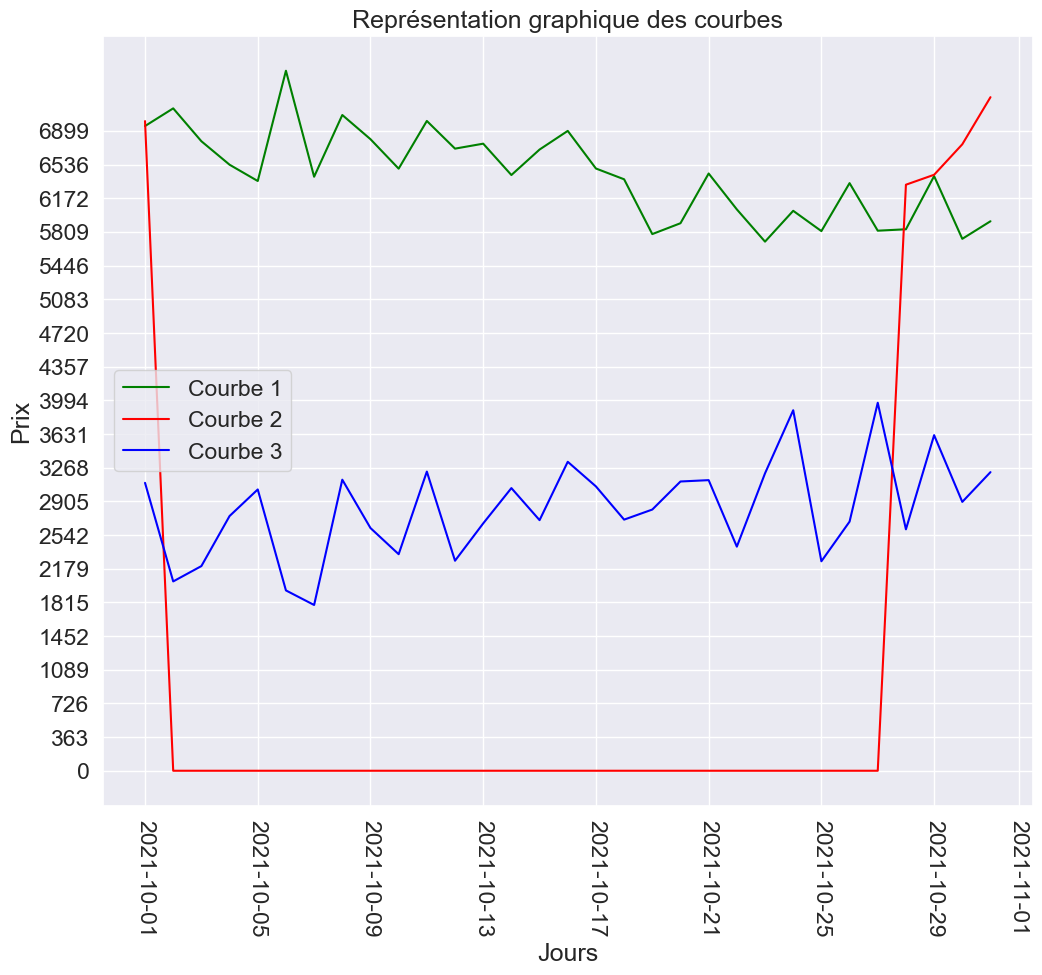

In [75]:
# Représentation graphique des trois courbes dans un seul graphe
plt.plot(mois_oct_0['Jours'], mois_oct_0['price'], color='green', label='Courbe 1')
plt.plot(mois_oct['Jours'], mois_oct['price'], color='red', label='Courbe 2')
plt.plot(mois_oct_2['Jours'], mois_oct_2['price'], color='blue', label='Courbe 3')

# Set the x-axis tick positions based on the length of the series
x_ticks = df_dates['Jours']
plt.xticks(rotation=-90, ha='center')

# Set the y-axis tick positions based on the data range and desired interval
y_min = mois_oct[['price']].min().min()
y_max = mois_oct[['price']].max().max()
y_ticks = plt.yticks(np.arange(y_min, y_max, (y_max - y_min) * 0.05))

# Affichage du titre et noms des axes
plt.xlabel('Jours')
plt.ylabel('Prix')
plt.title('Représentation graphique des courbes')

# Ajout d'une légende
plt.legend()

# Affichage du graphe
plt.show()

In [76]:
# Selection des données sans mois octobre
dat_comp =dat_comp[dat_comp['Mois']!='2021-10']

# 5. Les produits

## 5.1. Nombre de ventes des produits (Tops et Flops)
↺ [Sommaire](#Sommaire)

In [77]:
# Produits qui sont le moins vendus 
flop = dat_comp[['price','id_prod']].groupby(['id_prod']).count().reset_index().sort_values(by='price')
print('Les 10 produits les moins vendus:\n\n')
flop.head(10).rename(columns={'price':'nombre de ventes'})

Les 10 produits les moins vendus:




,id_prod,nombre de ventes
166,0_1151,1
2177,0_898,1
2164,0_886,1
2106,0_833,1
2077,0_807,1
3173,2_23,1
548,0_1498,1
1782,0_541,1
588,0_1533,1
594,0_1539,1


In [78]:
print('Les 10 produits les plus vendus:\n')
flop.tail(10).rename(columns={'price':'nombre de ventes'})

Les 10 produits les plus vendus:



,id_prod,nombre de ventes
2631,1_407,1923
2630,1_406,1931
2638,1_413,1931
2637,1_412,1938
2627,1_403,1950
2651,1_425,2084
2731,1_498,2117
2639,1_414,2166
2642,1_417,2173
2589,1_369,2237


In [79]:
# Prix moyen d'un produit
print('Le prix moyen d\'un produit est de:',round(dat_comp['price'].mean(),2),'€.')

Le prix moyen d'un produit est de: 17.54 €.


## 5.2. Nombre de ventes des produits (Tops et Flops) par catégorie
↺ [Sommaire](#Sommaire)

In [80]:
# Les produits vendues de la catégorie 0
flop0 = dat_comp[['price','id_prod']][dat_comp['categ']==0].groupby(['id_prod']).count().reset_index().sort_values(by='price')
print('Les 10 produits les moins vendus vendus dan la catégorie 0:\n')
flop0.head(10).rename(columns={'price':'nombre de ventes'})

Les 10 produits les moins vendus vendus dan la catégorie 0:



,id_prod,nombre de ventes
1782,0_541,1
2269,0_980,1
751,0_1683,1
548,0_1498,1
664,0_1601,1
588,0_1533,1
2077,0_807,1
166,0_1151,1
801,0_1728,1
594,0_1539,1


In [81]:
print('Les 10 produits les plus vendus vendus dan la catégorie 0:\n')
flop0.tail(10).rename(columns={'price':'nombre de ventes'})

Les 10 produits les plus vendus vendus dan la catégorie 0:



,id_prod,nombre de ventes
478,0_1434,1177
471,0_1428,1178
486,0_1441,1179
453,0_1411,1191
476,0_1432,1191
467,0_1424,1193
0,0_0,1194
468,0_1425,1215
465,0_1422,1233
475,0_1431,1234


In [82]:
# Les produits vendues de la catégorie 1
flop1 = dat_comp[['price','id_prod']][dat_comp['categ']==1].groupby(['id_prod']).count().reset_index().sort_values(by='price')
print('Les 10 produits les moins vendus vendus dan la catégorie 1:\n\n')
flop1.head(10).rename(columns={'price':'nombre de ventes'})

Les 10 produits les moins vendus vendus dan la catégorie 1:




,id_prod,nombre de ventes
356,1_420,2
460,1_514,2
336,1_402,2
343,1_409,3
342,1_408,3
338,1_404,3
52,1_146,3
346,1_411,4
139,1_224,4
437,1_494,4


In [83]:
print('Les 10 produits les plus vendus vendus dan la catégorie 1:\n\n')
flop1.tail(10).rename(columns={'price':'nombre de ventes'})

Les 10 produits les plus vendus vendus dan la catégorie 1:




,id_prod,nombre de ventes
341,1_407,1923
348,1_413,1931
340,1_406,1931
347,1_412,1938
337,1_403,1950
361,1_425,2084
441,1_498,2117
349,1_414,2166
352,1_417,2173
299,1_369,2237


In [84]:
# Les produits vendues de la catégorie 2
flop2 = dat_comp[['price','id_prod']][dat_comp['categ']==2].groupby(['id_prod']).count().reset_index().sort_values(by='price')
print('Les 10 produits les moins vendus dan la catégorie 2: \n')
flop2.head(10).rename(columns={'price':'nombre de ventes'})

Les 10 produits les moins vendus dan la catégorie 2: 



,id_prod,nombre de ventes
146,2_23,1
234,2_98,1
218,2_81,1
214,2_78,2
37,2_131,2
229,2_93,2
213,2_77,2
202,2_66,2
160,2_28,3
36,2_130,3


In [85]:
print('\n\nLes 10 produits les plus vendus vendus dan la catégorie 2:\n\n')
flop2.tail(10).rename(columns={'price':'nombre de ventes'})



Les 10 produits les plus vendus vendus dan la catégorie 2:




,id_prod,nombre de ventes
12,2_109,718
121,2_207,761
123,2_209,791
122,2_208,805
14,2_110,834
170,2_37,867
172,2_39,882
16,2_112,930
41,2_135,977
5,2_102,997


In [86]:
# Nombre de ventes dans chaque catégorie
print('Le nombre de ventes dans la catégorie 0 est de:',flop0['price'].sum(),'ventes, soit:',round(flop0['price'].count()*100/flop['price'].count(),2),'% du nombre total.\n')
print('Le nombre de ventes dans la catégorie 1 est de:',flop1['price'].sum(),'ventes, soit:',round(flop1['price'].count()*100/flop['price'].count(),2),'% du nombre total.\n')
print('Le nombre de ventes dans la catégorie 2 est de:',flop2['price'].sum(),'ventes, soit:',round(flop2['price'].count()*100/flop['price'].count(),2),'% du nombre total.\n')

Le nombre de ventes dans la catégorie 0 est de: 396697 ventes, soit: 70.18 % du nombre total.

Le nombre de ventes dans la catégorie 1 est de: 225503 ventes, soit: 22.59 % du nombre total.

Le nombre de ventes dans la catégorie 2 est de: 35312 ventes, soit: 7.23 % du nombre total.



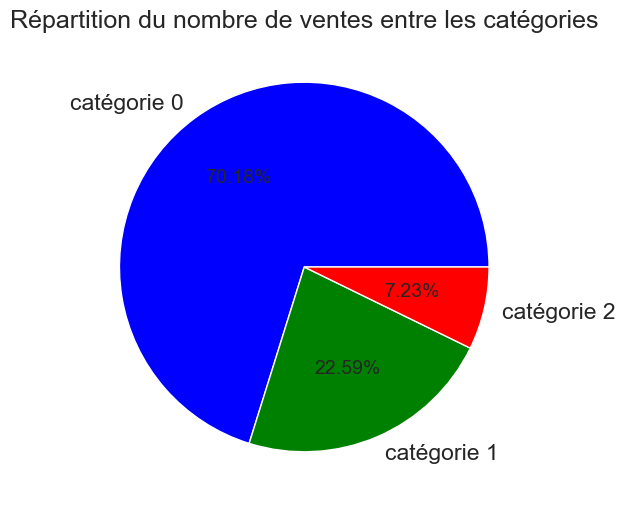

In [87]:
Categ0 = flop0['price'].count()
Categ1 = flop1['price'].count()
Categ2 = flop2['price'].count()

# Représentation graphique pie chart
plt.figure(figsize=(10, 6))
pie = [Categ0, Categ1, Categ2]
colors = ['blue', 'green', 'red']
labels = ('catégorie 0', 'catégorie 1', 'catégorie 2')
plt.pie(pie, labels=labels, colors=colors, explode=(0, 0, 0), autopct='%.2f%%')
plt.title('Répartition du nombre de ventes entre les catégories')
plt.show()

In [88]:
# Prix moyen des produits par catégorie
print('Le prix moyen d\'un produit de la catégorie 0 est:',round(dat_comp[dat_comp['categ']==0.0]['price'].mean(),2),'€.')
print('Le prix moyen d\'un produit de la catégorie 1 est:',round(dat_comp[dat_comp['categ']==1.0]['price'].mean(),2),'€.')
print('Le prix moyen d\'un produit de la catégorie 2 est:',round(dat_comp[dat_comp['categ']==2.0]['price'].mean(),2),'€.')

Le prix moyen d'un produit de la catégorie 0 est: 10.64 €.
Le prix moyen d'un produit de la catégorie 1 est: 20.49 €.
Le prix moyen d'un produit de la catégorie 2 est: 76.25 €.


## 5.3. Répartition des produits vendus entre les clients
↺ [Sommaire](#Sommaire)

In [89]:
# On compte le nombre de produits vendus par client
produits_clients = dat_comp.groupby(dat_comp['client_id'])['id_prod'].count().reset_index(name ='nbr_produits')
prdt = produits_clients['nbr_produits']
n = len(prdt)
n

8598

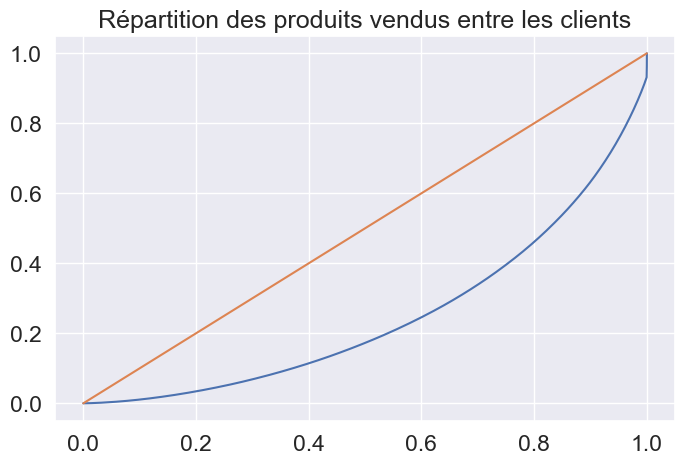

In [90]:
# Tri des valeurs par ordre croissant, La somme cummulée et Normalisation en divisant par prdt.sum()
lorenz = np.cumsum(np.sort(prdt)) / prdt.sum()
lorenz = np.append([0],lorenz) # lorenz contient les ordonnées pour chaque point
# On crée les abscisses pour chaque points
xaxis = np.linspace(0-1/n,1+1/n,n+1)

# On trace la courbe de Lorenz et la première bissectrice
plt.figure(figsize=(8, 5))
plt.plot(xaxis,lorenz)
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title("Répartition des produits vendus entre les clients")
plt.show()

In [91]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
surface = 0.5 - AUC 
gini = 2*surface
print("Indice de gini:", round(gini, 3))

Indice de gini: 0.498


# 5.4. Répartition du chiffre d'affaire entre les produits
↺ [Sommaire](#Sommaire)

In [92]:
# Création de la variable chiffre d'affaires par produit
ca_produits = dat_comp.groupby('id_prod')['price'].sum().reset_index(name='CA par produit')

# Fusion de la colonne 'CA par produit' et le DataFrame 'dat_comp' en utilisant la colonne 'id_prod' comme clé
dat_comp = dat_comp.merge(ca_produits, on='id_prod')

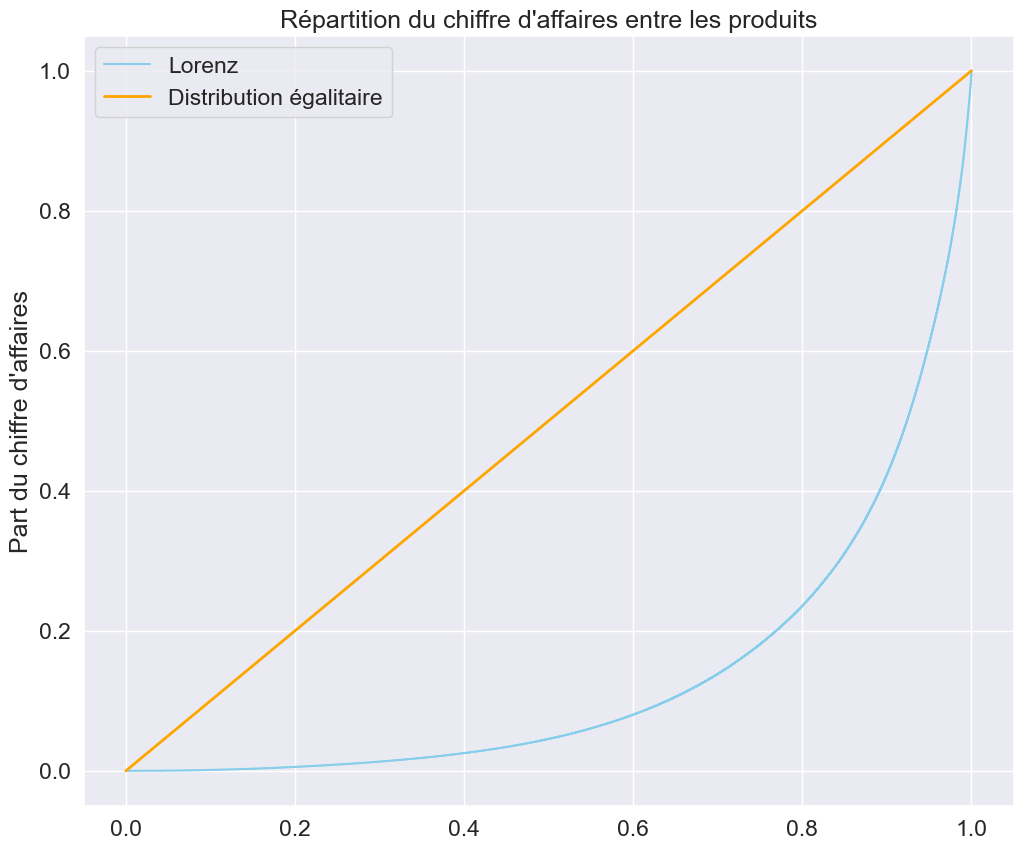

Indice de gini: 0.726


In [93]:
# Tri des individus dans l'ordre croissant des valeurs de la variable
dep = dat_comp[['price','CA par produit']].groupby(['CA par produit']).sum()['price']
n = len(dep)
lorenz_price = np.cumsum(np.sort(dep)) / dep.sum()
lorenz_price = np.append([0],lorenz_price) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='skyblue', label='Lorenz')
plt.plot([0, 1], [0, 1], 'orange', lw=2, label='Distribution égalitaire')
plt.title('Répartition du chiffre d\'affaires entre les produits')
plt.xlabel('')
plt.ylabel("Part du chiffre d'affaires")
plt.legend(loc="best")

plt.show()
# Indice de gini
AUC = (lorenz_price.sum() -lorenz_price[-1]/2 -lorenz_price[0]/2)/n # Surface sous la courbe de Lorenz
surface = 0.5 - AUC # On calcul la surface entre la première bissectrice et la courbe de Lorenz
gini = 2*surface
print("Indice de gini:", round(gini, 3))

# 6.Les clients

## 6.1. Genre des clients
↺ [Sommaire](#Sommaire)

In [94]:
#Comptage des clients femme et des clients homme, puis calcul de leur proportion. 
sex_client=cust['sex'].value_counts().reset_index()
sex_client.columns = ['sexe', 'effectif']
sex_client['prop']=(sex_client['effectif']/sex_client['effectif'].sum())*100
sex_client

,sexe,effectif,prop
0,f,4490,52.082125
1,m,4131,47.917875


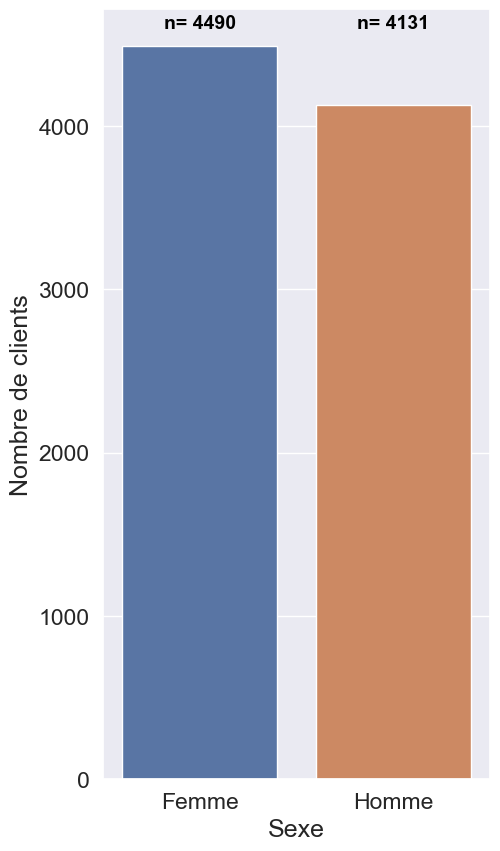

In [95]:
plt.rcParams["figure.figsize"] = (5,10)

ax = sns.barplot(x="sexe", y="effectif", data=sex_client)
ax.set_xticklabels(['Femme','Homme'])
plt.xlabel("Sexe")
plt.ylabel("Nombre de clients")

# Récupération et représentation des effectifs par âge : 
nobs = cust['sex'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            4599,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='semibold')
    
plt.savefig('fig8_effectif_sexe.png', dpi=300, bbox_inches='tight')

## 6.2. Âge des clients
↺ [Sommaire](#Sommaire)

In [97]:
freq_achats_par_age = dat_comp.groupby('age')[['session_id']].count()
freq_achats_par_age = freq_achats_par_age.reset_index()
freq_achats_par_age.rename(columns={'session_id':'Nbre achats'},inplace=True)
freq_achats_par_age

,age,Nbre achats
0,19,14769
1,20,4238
2,21,4465
3,22,4161
4,23,4297
...,...,...
71,90,314
72,91,293
73,92,164
74,93,222


In [98]:
# On sélectionne l'age et les id_client
client_age = dat_comp[['client_id', 'age']].copy()
client_age.drop_duplicates(inplace=True)
#req_achats_par_age['Fréquence']= client_age['age'].value_counts(normalize=True).reset_index(name='Fréquence').sort_values('age')
clients_age=client_age['age'].value_counts(normalize=True).rename_axis('age').reset_index(name='Fréquence').sort_values('age')
clients_age

,age,Fréquence
0,19,0.050826
31,20,0.016864
29,21,0.016864
40,22,0.014538
38,23,0.015818
...,...,...
71,90,0.000930
72,91,0.000698
73,92,0.000465
74,93,0.000465


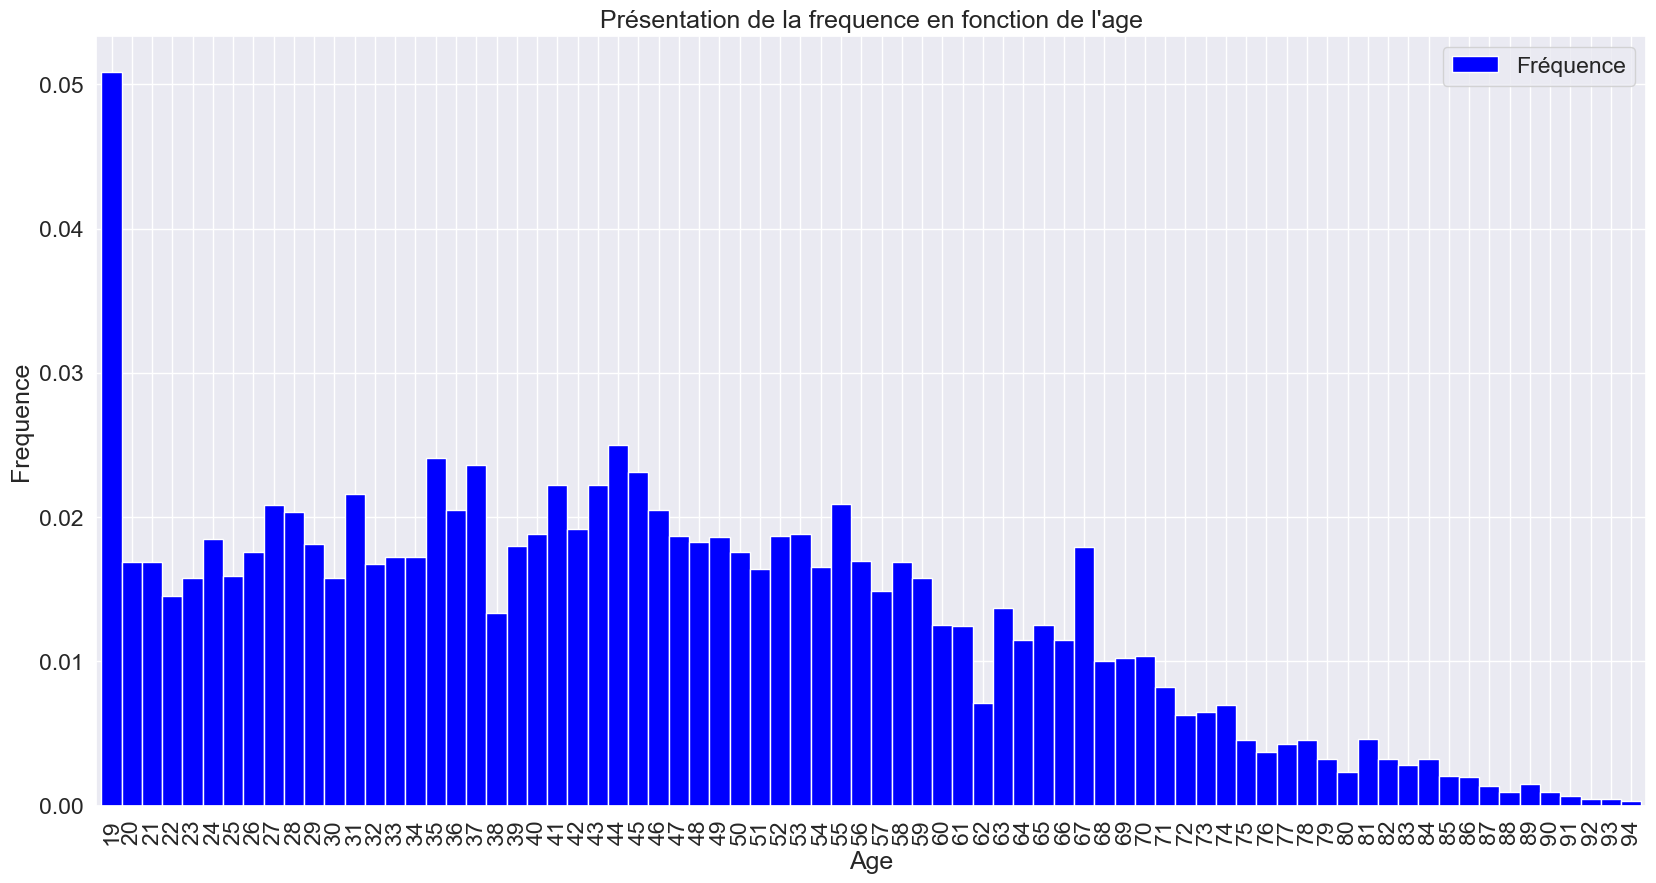

In [99]:
# Définition de la largeur des barres
largeur_barres = 1
# Configuration de la taille de la police pour l'ensemble du graphique
plt.rcParams.update({'font.size': 9})
# Configuration de la taille de la figure
plt.rcParams["figure.figsize"] = (20, 10)
# Création du diagramme en barres
ax = clients_age.set_index('age').plot(kind='bar', stacked=True, width=1, color='blue')

# Ajout de labels pour les axes x et y et un titre
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.title('Présentation de la frequence en fonction de l\'age')

# Affichage du diagramme en barres
plt.show()

In [100]:
dat_comp

,id_prod,price,categ,date,Jours,Mois,Année,session_id,client_id,sex,birth,age,CA par produit
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,2022-05-20,2022-05,2022,s_211425,c_103,f,1986,37,2704.46
1,0_1518,4.18,0.0,2021-09-26 12:37:29.780414,2021-09-26,2021-09,2021,s_95811,c_6197,m,1985,38,2704.46
2,0_1518,4.18,0.0,2021-05-06 17:14:43.117440,2021-05-06,2021-05,2021,s_30782,c_682,f,1974,49,2704.46
3,0_1518,4.18,0.0,2022-03-16 18:57:10.420103,2022-03-16,2022-03,2022,s_180057,c_5932,f,1962,61,2704.46
4,0_1518,4.18,0.0,2022-11-12 18:58:10.574853,2022-11-12,2022-11,2022,s_296584,c_7217,f,1976,47,2704.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657507,0_1279,20.99,0.0,2022-11-23 06:50:48.888907,2022-11-23,2022-11,2022,s_301506,c_1025,m,1984,39,41.98
657508,0_1279,20.99,0.0,2021-06-23 06:50:48.888907,2021-06-23,2021-06,2021,s_52563,c_1025,m,1984,39,41.98
657509,0_1683,2.99,0.0,2021-12-24 04:37:46.407713,2021-12-24,2021-12,2021,s_139091,c_5508,f,1974,49,2.99
657510,0_886,21.82,0.0,2021-03-17 03:34:14.461358,2021-03-17,2021-03,2021,s_7410,c_7219,f,1966,57,21.82


In [101]:
# L'âge moyen et l'écart-type
print("L'âge moyen des clients est de", round(clients_age['age'].mean(), 1),"ans avec un écart-type de", round(clients_age['age'].std(), 1))

L'âge moyen des clients est de 56.5 ans avec un écart-type de 22.1


# 6.3. Chiffre d'affaire par client
↺ [Sommaire](#Sommaire)

In [102]:
# Détermination du chiffre d'affaires par client
client_CA = dat_comp.pivot_table(index='client_id', values='price', aggfunc=['sum']).reset_index()
client_CA.columns = ['client_id', 'CA']
client_CA

,client_id,CA
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1720.08
...,...,...
8593,c_995,189.41
8594,c_996,1611.59
8595,c_997,1432.02
8596,c_998,2779.88


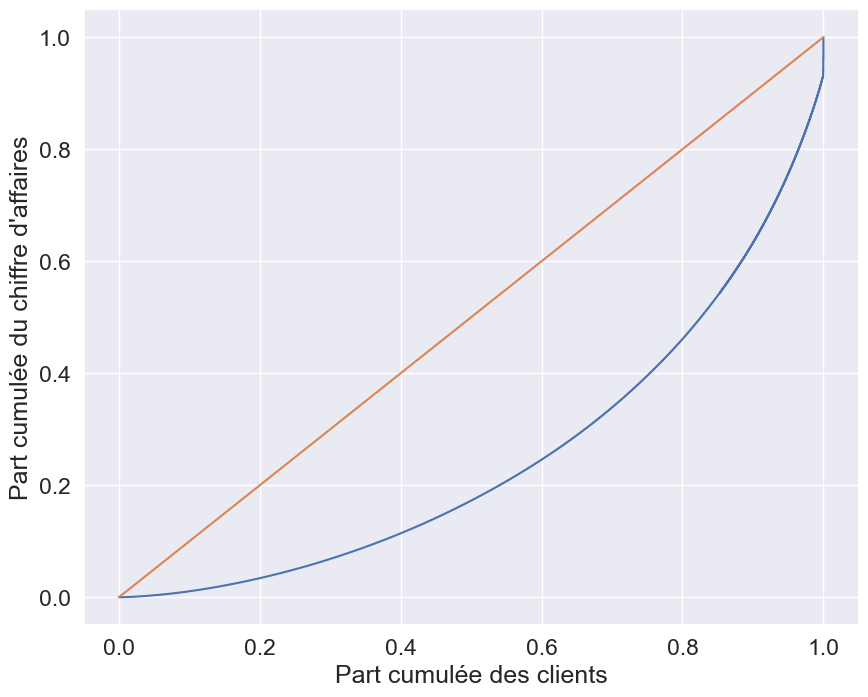

L'indice de gini est de : 0.5


In [103]:
# La seconde étape est de calculer la part cumulée du chiffre d'affaire : 

client_CA_prix = client_CA['CA'].values
n = len(client_CA_prix)
lorenz2 = np.cumsum(np.sort(client_CA_prix)) / client_CA_prix.sum()
lorenz2 = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Représentation graphique et création de l'axe x (part cumulée des clients)
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 20})
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.savefig('fig5_lorenz.png', dpi=300)
plt.show()
#Calcul de l'indice de Gini, allant de 0 (C.A. équilibré entre les clients) à 1 (C.A. dédéquilibré entre les clients)
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de gini est de :",round(gini,2))

In [104]:
# Detéction des clients affectants le plus le chiffre d'affaire
client_CA.sort_values('CA', ascending=False).head(10)

,client_id,CA
677,c_1609,312755.08
4387,c_4958,282654.61
6336,c_6714,149783.75
2723,c_3454,111766.71
2108,c_2899,5214.05
634,c_1570,5136.14
2513,c_3263,5129.89
7005,c_7319,5120.55
7790,c_8026,4969.41
4725,c_5263,4964.87


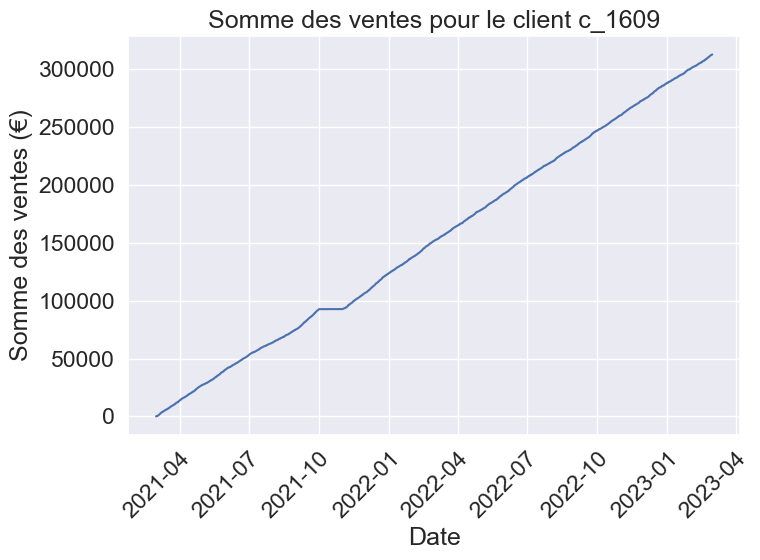

In [105]:
# Client c_1609
c_1609=dat_comp.loc[dat_comp['client_id']=='c_1609',:]
c_1609=c_1609.sort_values('date', ascending=True)
c_1609['Somme_Cum']=np.cumsum(c_1609['price'])

plt.rcParams["figure.figsize"] = (8,6)
sns.lineplot(x="date", y="Somme_Cum", data=c_1609)
plt.title('Somme des ventes pour le client c_1609')
plt.xlabel('Date')
plt.ylabel('Somme des ventes (€)')
plt.xticks(rotation=45, ha="right", rotation_mode='anchor')
plt.tight_layout()

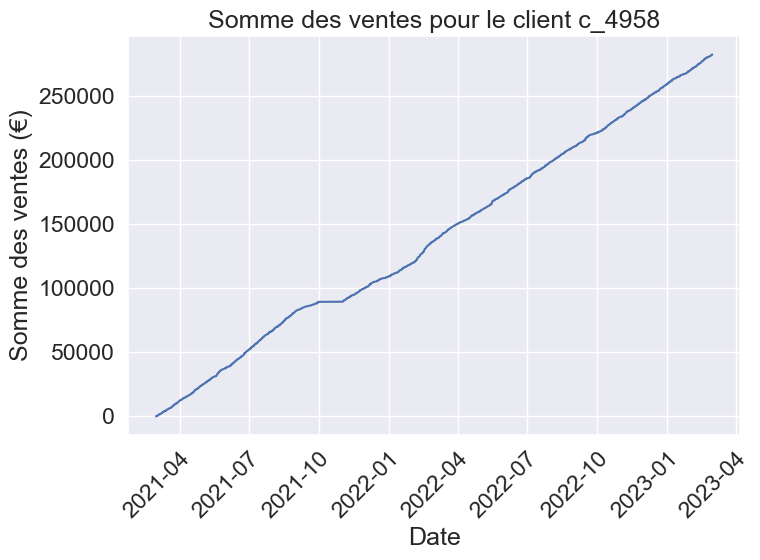

In [106]:
# Client c_4958
c_4958=dat_comp.loc[dat_comp['client_id']=='c_4958',:]
c_4958=c_4958.sort_values('date', ascending=True)
c_4958['Somme_Cum']=np.cumsum(c_4958['price'])

plt.rcParams["figure.figsize"] = (8,6)
sns.lineplot(x="date", y="Somme_Cum", data=c_4958)
plt.title('Somme des ventes pour le client c_4958')
plt.xlabel('Date')
plt.ylabel('Somme des ventes (€)')
plt.xticks(rotation=45, ha="right", rotation_mode='anchor')
plt.tight_layout()

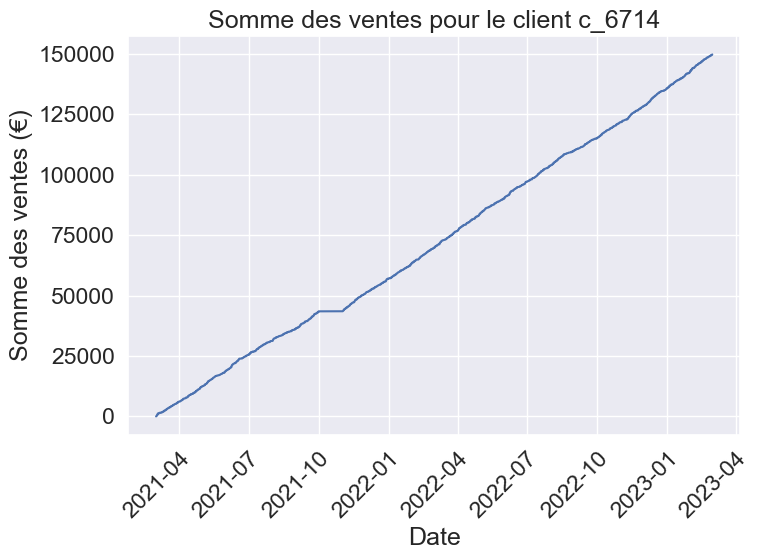

In [107]:
c_6714=dat_comp.loc[dat_comp['client_id']=='c_6714',:]
c_6714=c_6714.sort_values('date', ascending=True)
c_6714['Somme_Cum']=np.cumsum(c_6714['price'])

plt.rcParams["figure.figsize"] = (8,6)
sns.lineplot(x="date", y="Somme_Cum", data=c_6714)
plt.title('Somme des ventes pour le client c_6714')
plt.xlabel('Date')
plt.ylabel('Somme des ventes (€)')
plt.xticks(rotation=45, ha="right", rotation_mode='anchor')
plt.tight_layout()

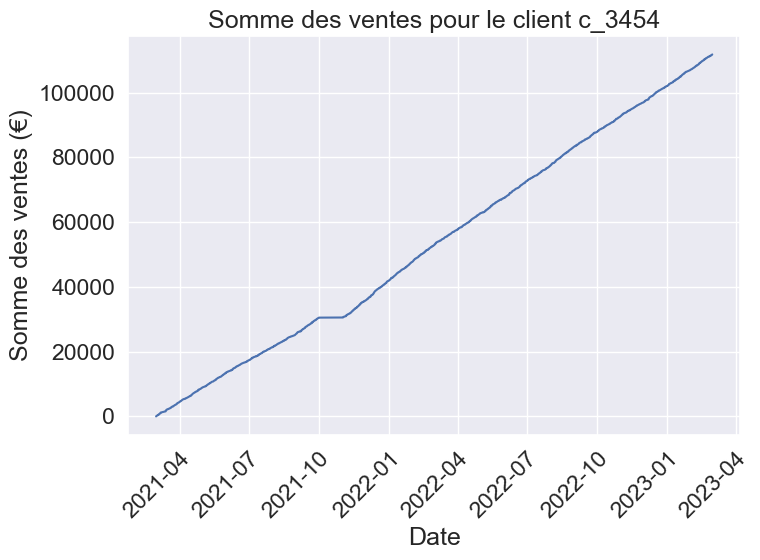

In [108]:
c_3454=dat_comp.loc[dat_comp['client_id']=='c_3454',:]
c_3454=c_3454.sort_values('date', ascending=True)
c_3454['Somme_Cum']=np.cumsum(c_3454['price'])

plt.rcParams["figure.figsize"] = (8,6)
sns.lineplot(x="date", y="Somme_Cum", data=c_3454)
plt.title('Somme des ventes pour le client c_3454')
plt.xlabel('Date')
plt.ylabel('Somme des ventes (€)')
plt.xticks(rotation=45, ha="right", rotation_mode='anchor')
plt.tight_layout()

In [109]:
# Détermination du chiffre d'affaires par client sans les clients c_1609,c_4958,c_6715 et c_3454
client_CA2 = dat_comp[(dat_comp['client_id']!='c_4958')&(dat_comp['client_id']!='c_1609')&(dat_comp['client_id']!='c_6715')&(dat_comp['client_id']!='c_3454')].pivot_table(index='client_id', values='price', aggfunc=['sum']).reset_index()
client_CA2.columns = ['client_id', 'CA']
client_CA2

,client_id,CA
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1720.08
...,...,...
8589,c_995,189.41
8590,c_996,1611.59
8591,c_997,1432.02
8592,c_998,2779.88


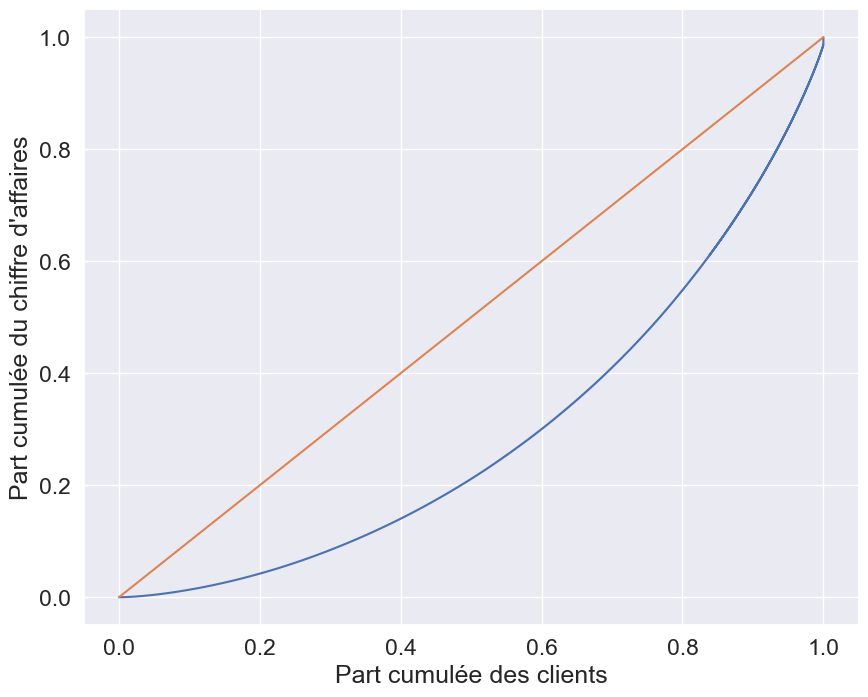

L'indice de gini est de : 0.41


In [110]:
# Le calcul de la part cumulée du chiffre d'affaire : 

client_CA_prix2 = client_CA2['CA'].values
n = len(client_CA_prix2)
lorenz = np.cumsum(np.sort(client_CA_prix2)) / client_CA_prix2.sum()
lorenz = np.append([0],lorenz)

# Représentation graphique et création de l'axe x (part cumulée des clients)
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 20})
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.savefig('fig5_lorenz.png', dpi=300)
plt.show()
#Calcul de l'indice de Gini, allant de 0 (C.A. équilibré entre les clients) à 1 (C.A. dédéquilibré entre les clients)
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de gini est de :",round(gini,2))

# 7. Liens entre variables

## 7.1. Lien entre le genre et la catégorie de livres achetés
↺ [Sommaire](#Sommaire)

In [111]:
# Création de categorie par genre
categ_par_genre = dat_comp[['sex','categ']]
# Créé une table de categ_par_genre avec crosstab pour calculer la fréquence
categ_par_genre_contingence = pd.crosstab(categ_par_genre['categ'], categ_par_genre['sex'], margins=False)
categ_par_genre_contingence

sex,f,m
categ,,
0.0,196986,199711
1.0,114087,111416
2.0,16722,18590


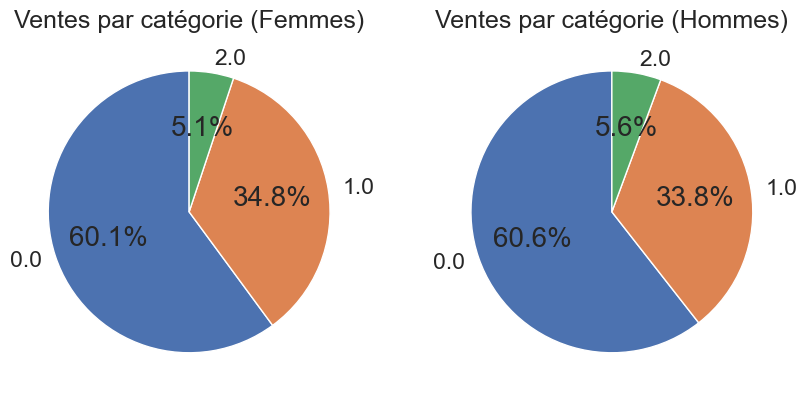

In [112]:
# Diviser chaque cellule par le total de la ligne correspondante et multiplier par 100
categ_par_genre_contingence['% Female'] = categ_par_genre_contingence['f'] * 100/ categ_par_genre_contingence['m'].sum() 
categ_par_genre_contingence['% Male'] = categ_par_genre_contingence['m'] * 100/ categ_par_genre_contingence['m'].sum() 

# Séparer les données par sexe
data_female = categ_par_genre_contingence['% Female']
data_male = categ_par_genre_contingence['% Male']

# Créer deux sous-graphiques (axes) pour les deux diagrammes circulaires
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Ajouter les données et les étiquettes pour le diagramme circulaire féminin
wedges, labels, autopct = ax1.pie(data_female, labels=data_female.index, startangle=90, autopct='%1.1f%%')

ax1.set_title('Ventes par catégorie (Femmes)')
ax2.set_title('Ventes par catégorie (Hommes)')

# Ajouter les données et les étiquettes pour le diagramme circulaire masculin
wedges, labels, autopct = ax2.pie(data_male, labels=data_male.index, startangle=90, autopct='%1.1f%%')

# Afficher les diagrammes circulaires
plt.show()

In [113]:
categ_par_genre1 = dat_comp[['sex','categ']]
# Créé une table de categ_par_genre avec crosstab pour calculer la fréquence
categ_par_genre2 = pd.crosstab(categ_par_genre["categ"], categ_par_genre["sex"],margins=False)
categ_par_genre2
st_chi2, st_p, st_dof, st_exp = scipy.stats.chi2_contingency(categ_par_genre2)
print('Satistique chi2 =',st_chi2)
print('P-value =',st_p)
print('La p-value est:')
if (st_p>=0.05)==True:
    print('Supérieure à 5%, on garde l\'hypothèse H0.')
else:
    print('Inférieure à 5%, on rejette l\'hypothèse H0.')

Satistique chi2 = 143.5555396400573
P-value = 6.719092869603587e-32
La p-value est:
Inférieure à 5%, on rejette l'hypothèse H0.


## 7.2. Lien entre l'âge et montant total des achats
↺ [Sommaire](#Sommaire)

In [114]:
# Calcul du nombre d'achat réalisé par session pour chaque âge
age_panier_t = dat_comp.groupby(['age', 'session_id']).price.sum().reset_index(name='montant panier')
age_panier_t = age_panier_t.groupby(['age'])['montant panier'].sum().reset_index(name='panier_total')
age_panier_t

,age,panier_total
0,19,591414.23
1,20,172831.75
2,21,178767.19
3,22,174347.66
4,23,160555.21
...,...,...
71,90,5078.98
72,91,4803.64
73,92,2691.19
74,93,3959.24


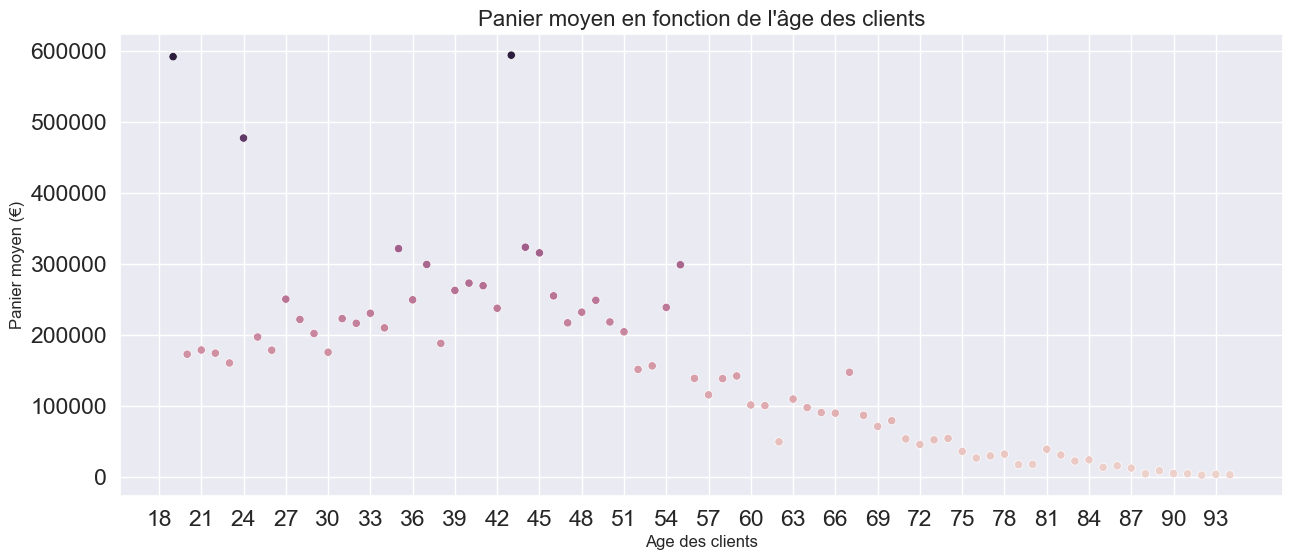

In [115]:
# Représentation nuage de point
plt.figure(figsize=(15,6))
sns.scatterplot(x='age', y='panier_total', data= age_panier_t, hue='panier_total', legend=False)
plt.title("Panier moyen en fonction de l'âge des clients", fontsize=16)
plt.xlabel("Age des clients", fontsize=12)
plt.ylabel("Panier moyen (€)", fontsize=12)
# remplacement des valeurs de l'axe des x par les étiquettes des tranches d'âge 
plt.xticks(range(18,95,3))
plt.show()
age_panier_t['rang age'] = pd.cut(x=age_panier_t['age'], bins=[18, 30, 50, 95])

#### Test de normalité des variables

In [116]:
# Test de Shapiro-Wilk
print("Montant total")
print(scipy.stats.shapiro(age_panier_t['panier_total']))
print("Age")
print(scipy.stats.shapiro(age_panier_t['age']))

Montant total
ShapiroResult(statistic=0.8883700966835022, pvalue=6.589608801732538e-06)
Age
ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)


In [117]:
#Coefficient de Spearman
scipy.stats.spearmanr(age_panier_t.age,age_panier_t.panier_total)

SignificanceResult(statistic=-0.857634996582365, pvalue=4.549641585441243e-23)

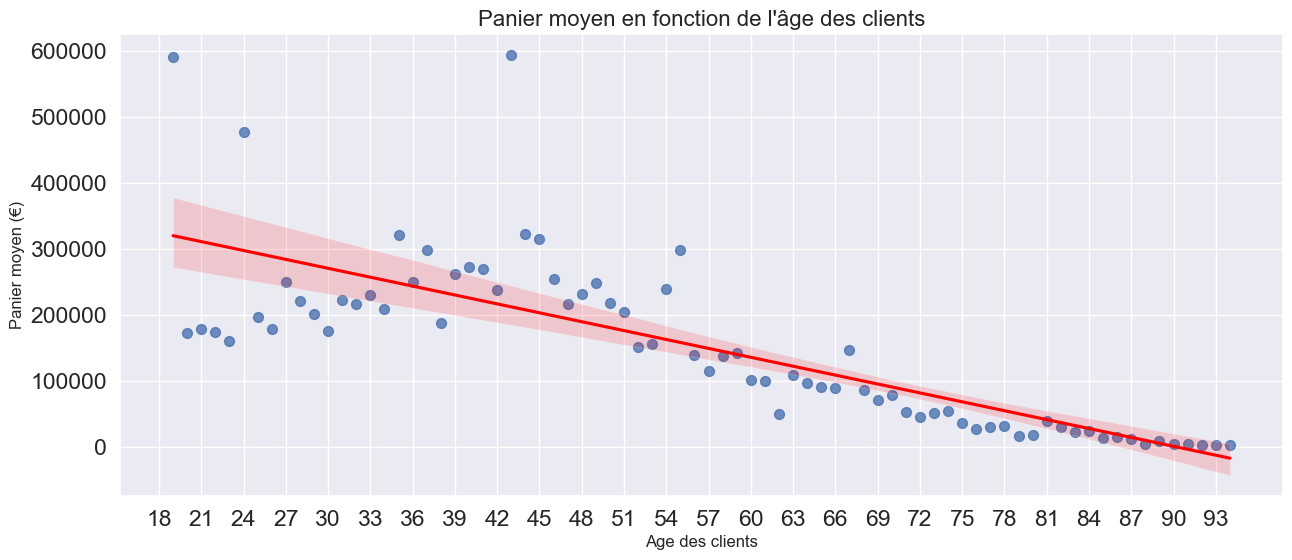

<Figure size 1000x800 with 0 Axes>

In [118]:
# Représentation nuage de point avec courbe de tendance
plt.figure(figsize=(15,6))
sns.regplot(x='age', y='panier_total', data= age_panier_t, scatter_kws={"s": 50}, line_kws={"color":"red"}, label='Données')
plt.title("Panier moyen en fonction de l'âge des clients", fontsize=16)
plt.xlabel("Age des clients", fontsize=12)
plt.ylabel("Panier moyen (€)", fontsize=12)
 
plt.xticks(range(18,95,3))
plt.show()
plt.savefig('C:/Users/Dell/Desktop/data_analyst_path/Projet06_Analysez les ventes d\'une librairie avec R ou Python/corréations/ l\'âge et montant total des achats.png')

## 7.3. Lien entre l'âge et la fréquence d'achat
↺ [Sommaire](#Sommaire)

In [119]:
# Le nombre de jour entre les dates min et max des transactions
nbr_jour = dat_comp['date'].dt.date.max() - dat_comp['date'].dt.date.min()
print(nbr_jour)

729 days, 0:00:00


In [120]:
frequence = freq_achats_par_age
frequence

,age,Nbre achats
0,19,14769
1,20,4238
2,21,4465
3,22,4161
4,23,4297
...,...,...
71,90,314
72,91,293
73,92,164
74,93,222


In [121]:
# Ensuite on calcule la fréquence d'achat en divisant par le nombre de mois
frequence['frequence'] = frequence['Nbre achats']/(729/30)
frequence

,age,Nbre achats,frequence
0,19,14769,607.777778
1,20,4238,174.403292
2,21,4465,183.744856
3,22,4161,171.234568
4,23,4297,176.831276
...,...,...,...
71,90,314,12.921811
72,91,293,12.057613
73,92,164,6.748971
74,93,222,9.135802


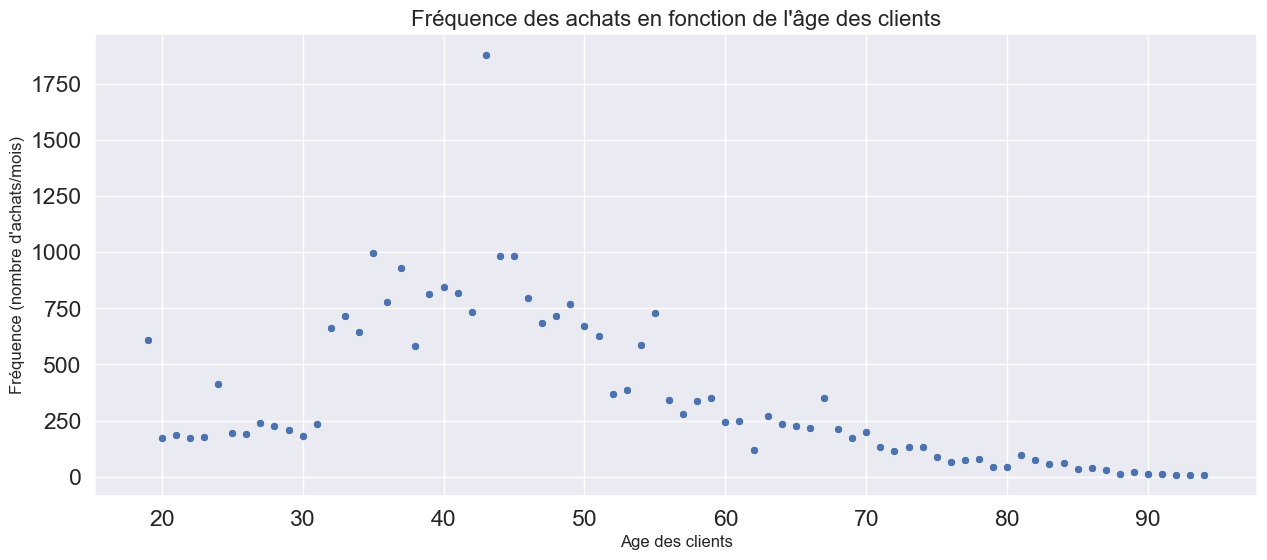

In [122]:
# Représentation en nuage de point de la fréquence d'achat en fonction de l'âge
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'age', y = 'frequence', data= frequence)

plt.title('Fréquence des achats en fonction de l\'âge des clients', fontsize= 16)
plt.xlabel('Age des clients', fontsize= 12)
plt.ylabel('Fréquence (nombre d\'achats/mois)', fontsize= 12)
plt.show()

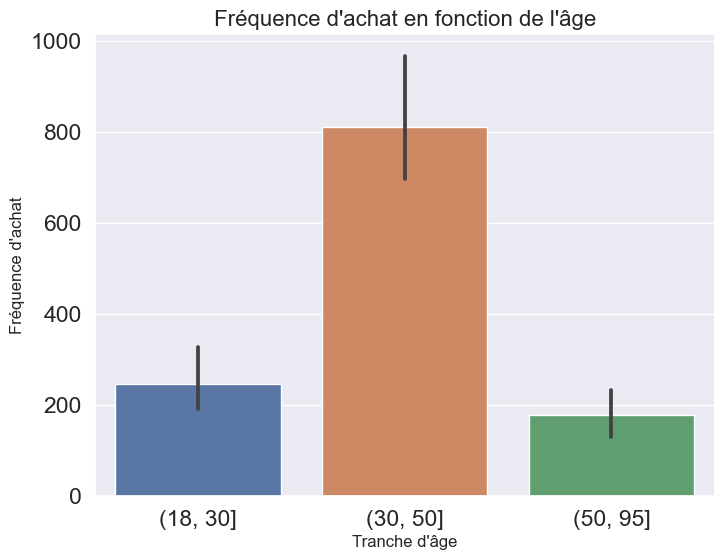

In [123]:
# Création d'une colonne 'age_range'
frequence['rang age'] = pd.cut(x=frequence['age'], bins=[18, 30, 50, 95])
boite_moustaches = frequence[['rang age', 'frequence']].copy()

plt.figure(figsize=(8,6))
sns.barplot(x='rang age', y='frequence', data=boite_moustaches)
plt.title("Fréquence d'achat en fonction de l'âge", fontsize=16)
plt.xlabel("Tranche d'âge", fontsize=12)
plt.ylabel("Fréquence d'achat", fontsize=12)
plt.show()

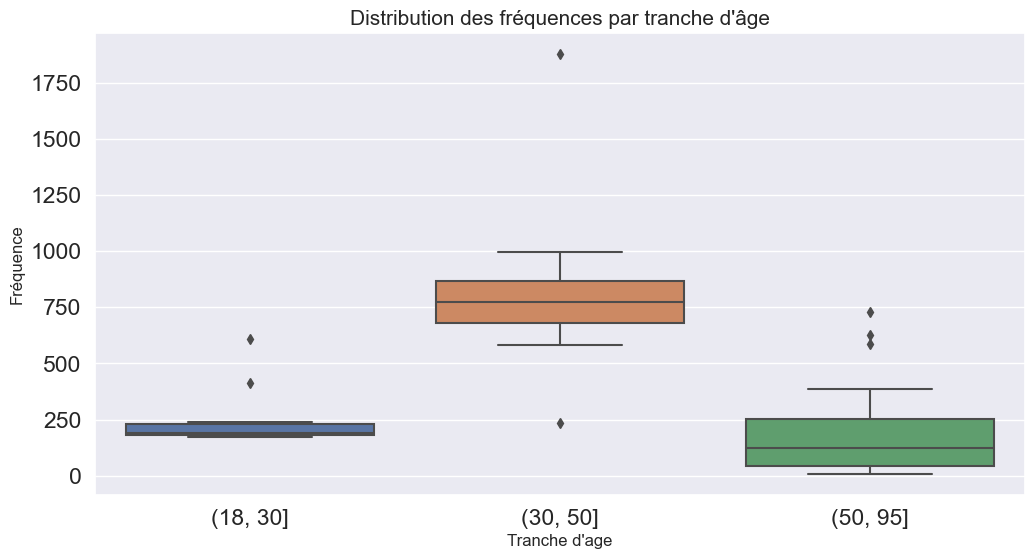

In [124]:
# Distrubition des fréquences dans chaque tranche d'age
plt.figure(figsize=(12, 6))

sns.boxplot(x='rang age', y='frequence', data=boite_moustaches)
plt.title('Distribution des fréquences par tranche d\'âge', fontsize=15)
plt.xlabel('Tranche d\'age', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

##### Test de normalité:

In [125]:

# On change le type de la variable 'age_range' en objet string
boite_moustaches['rang age'] = boite_moustaches['rang age'].astype(str)

# On sélectionne les distributions de fréquence pour chaque tranche d'âge
tranche1 = boite_moustaches.loc[boite_moustaches['rang age'] == '(18, 30]']['frequence']
tranche2 = boite_moustaches.loc[boite_moustaches['rang age'] == '(30, 50]']['frequence']
tranche3 = boite_moustaches.loc[boite_moustaches['rang age'] == '(50, 95]']['frequence']

# On vérifie si ces distributions suivent une loi normale à l'aide du test de Shapiro-Wilk
print("tranche1")
print(scipy.stats.shapiro(tranche1))
print(" ")
print("tranche2")
print(scipy.stats.shapiro(tranche2))
print(" ")
print("tranche3")
print(scipy.stats.shapiro(tranche3))

tranche1
ShapiroResult(statistic=0.6179595589637756, pvalue=0.00015206415264401585)
 
tranche2
ShapiroResult(statistic=0.7575975656509399, pvalue=0.00021502845629584044)
 
tranche3
ShapiroResult(statistic=0.8502470850944519, pvalue=4.432478090166114e-05)


##### Test de Kolmogrov-Smirnov

In [126]:
stat, p1 = scipy.stats.ks_2samp(tranche1, tranche2)
stat2, p2 = scipy.stats.ks_2samp(tranche1, tranche3)
stat3, p3 = scipy.stats.ks_2samp(tranche2, tranche3)

if p1 < 0.05 or p2 < 0.05 or p3 < 0.05:
    print('Les distributions ne sont pas identiques:\nComparaison des groupes 1 et 2: p-value=',p1,'\nComparaison des groupes 1 et 3: p-value=', p2,'\nComparaison des groupes 2 et 3: p-value=', p3)
else:
    print('Les distributions sont identiques:\n Comparaison des groupes 1 et 2 \n p-value=',p1,'Comparaison des groupes 1 et 3 \n p-value=', p2,'Comparaison des groupes 2 et 3: p-value=', p3)

Les distributions ne sont pas identiques:
Comparaison des groupes 1 et 2: p-value= 9.654867709711258e-07 
Comparaison des groupes 1 et 3: p-value= 0.0013535052895016944 
Comparaison des groupes 2 et 3: p-value= 1.1625850561157969e-11


# 7.4. Lien entre l'âge et montant du panier moyen
↺ [Sommaire](#Sommaire)

In [127]:
# Calcul du nombre d'achat réalisé par session pour chaque âge
age_panier_m = dat_comp.groupby(['age', 'session_id']).price.sum().reset_index(name='montant panier')
age_panier_m = age_panier_m.groupby(['age'])['montant panier'].mean().reset_index(name='panier_moyen')
age_panier_m

,age,panier_moyen
0,19,70.904475
1,20,69.577999
2,21,70.742853
3,22,73.533387
4,23,68.089572
...,...,...
71,90,22.775695
72,91,24.508367
73,92,29.573516
74,93,27.686993


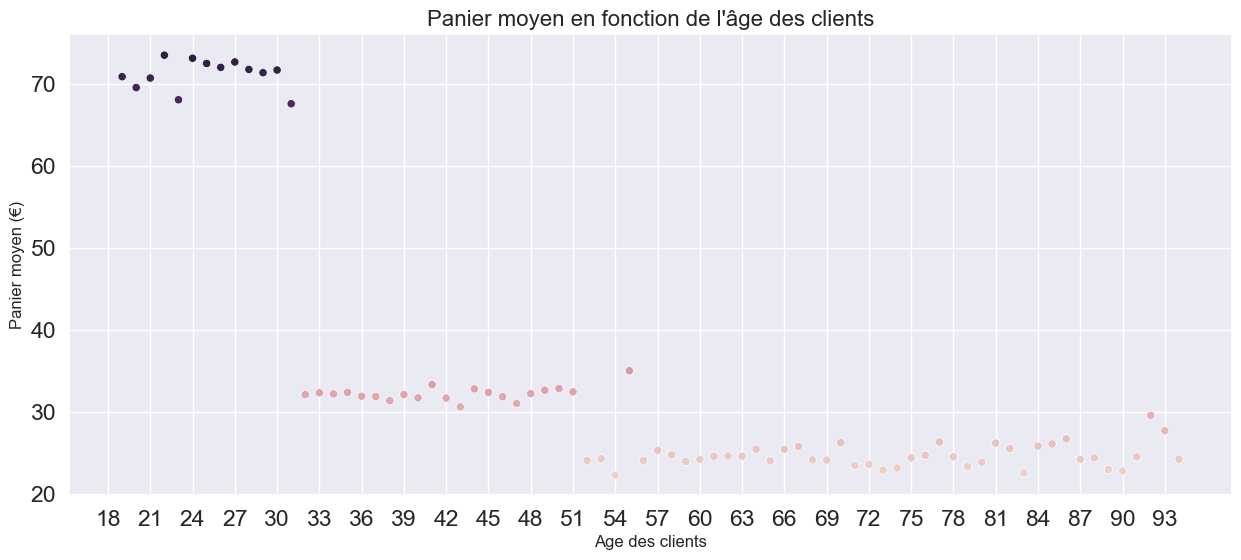

In [128]:
# Représentation nuage de point
plt.figure(figsize=(15,6))
sns.scatterplot(x='age', y='panier_moyen', data= age_panier_m, hue='panier_moyen', legend=False)
plt.title("Panier moyen en fonction de l'âge des clients", fontsize=16)
plt.xlabel("Age des clients", fontsize=12)
plt.ylabel("Panier moyen (€)", fontsize=12)
# remplacement des valeurs de l'axe des x par les étiquettes des tranches d'âge 
plt.xticks(range(18,95,3))
plt.show()
age_panier_m['rang age'] = pd.cut(x=age_panier_m['age'], bins=[18, 30, 50, 95])

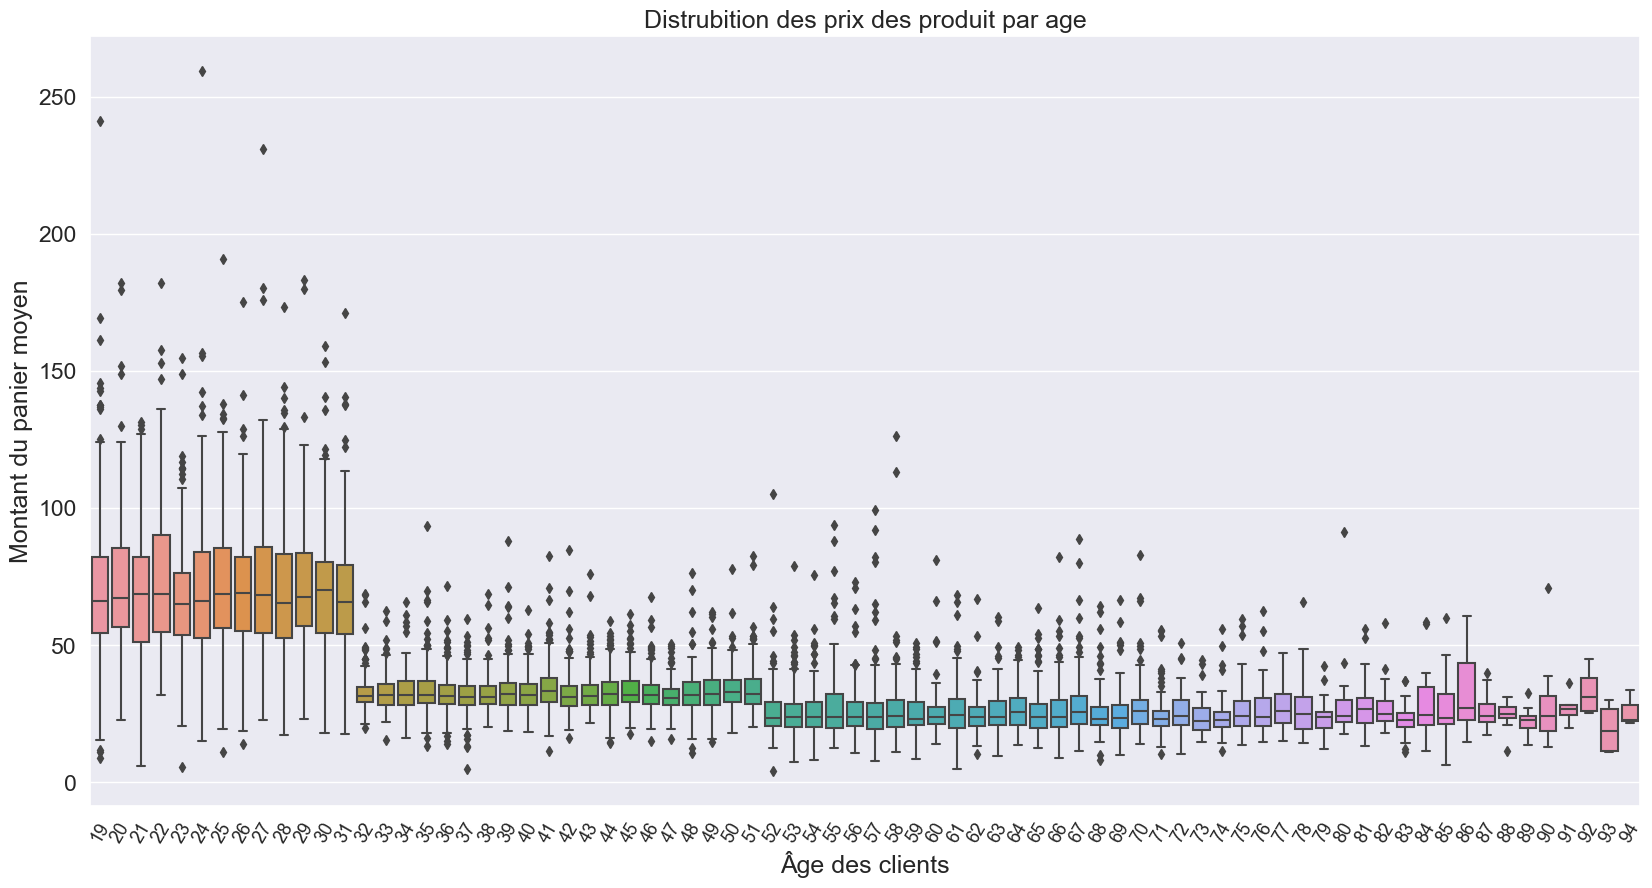

In [129]:
client_session=dat_comp.pivot_table(index=['client_id','age','session_id'], values='price', aggfunc=['sum','count','mean']).reset_index()
client_session.columns = ['client_id', 'age', 'session_id','Somme_panier','nombre_achat','moy_prix']
plt.rcParams['figure.figsize'] = (20,10)
sns.boxplot(y='Somme_panier', 
            x='age', 
            data=client_session.groupby(['client_id','age']).agg({'Somme_panier':'mean'}).reset_index())
plt.xticks(rotation=60,fontsize=13)
plt.xlabel('Âge des clients')
plt.ylabel('Montant du panier moyen')
plt.title('Distrubition des prix des produit par age')
plt.savefig('fig14a_montant_moy_panier1.png', dpi=300, bbox_inches='tight')

#### Test de normalité des distributions des paniers moyens

#### test de shapiro

In [130]:
# Test de Shapiro-Wilk
print('Montant moyen')
print(scipy.stats.shapiro(age_panier_m['panier_moyen']))
print('Age')
print(scipy.stats.shapiro(age_panier_m['age']))

Montant moyen
ShapiroResult(statistic=0.6328734159469604, pvalue=1.7241079440857843e-12)
Age
ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)


#### test de spearman

In [131]:
#Coefficient de Spearman
scipy.stats.spearmanr(age_panier_m.age,age_panier_m.panier_moyen)

SignificanceResult(statistic=-0.7662064251537936, pvalue=7.326854533939292e-16)

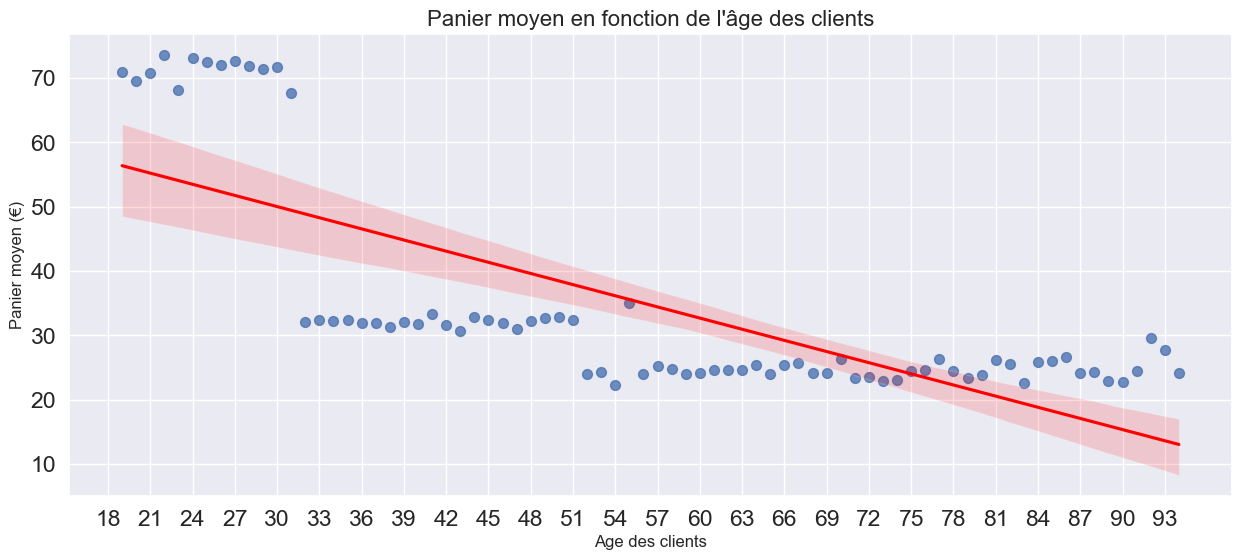

<Figure size 2000x1000 with 0 Axes>

In [132]:
# Représentation nuage de point avec courbe de tendance
plt.figure(figsize=(15,6))
sns.regplot(x='age', y='panier_moyen', data= age_panier_m, scatter_kws={"s": 50}, line_kws={"color":"red"}, label='Données')
plt.title("Panier moyen en fonction de l'âge des clients", fontsize=16)
plt.xlabel("Age des clients", fontsize=12)
plt.ylabel("Panier moyen (€)", fontsize=12)
# remplacement des valeurs de l'axe des x par les étiquettes des tranches d'âge 
plt.xticks(range(18,95,3))
plt.show()
plt.savefig('C:/Users/Dell/Desktop/data_analyst_path/Projet06_Analysez les ventes d\'une librairie avec R ou Python/corréations/l\'âge et la taille du panier moyen.png')

## 7.5. Lien entre l'âge et la catégorie de livres achetés
↺ [Sommaire](#Sommaire)

In [133]:
dat_comp = dat_comp[['id_prod','price','categ','date','session_id','client_id','sex','Année','age','Mois','Jours','CA par produit']]
dat_comp.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,Année,age,Mois,Jours,CA par produit
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,f,2022,37,2022-05,2022-05-20,2704.46
1,0_1518,4.18,0.0,2021-09-26 12:37:29.780414,s_95811,c_6197,m,2021,38,2021-09,2021-09-26,2704.46
2,0_1518,4.18,0.0,2021-05-06 17:14:43.117440,s_30782,c_682,f,2021,49,2021-05,2021-05-06,2704.46
3,0_1518,4.18,0.0,2022-03-16 18:57:10.420103,s_180057,c_5932,f,2022,61,2022-03,2022-03-16,2704.46
4,0_1518,4.18,0.0,2022-11-12 18:58:10.574853,s_296584,c_7217,f,2022,47,2022-11,2022-11-12,2704.46
5,0_1518,4.18,0.0,2022-04-22 23:06:41.761025,s_197935,c_4027,m,2022,38,2022-04,2022-04-22,2704.46
6,0_1518,4.18,0.0,2022-07-29 07:41:03.365405,s_245356,c_2732,f,2022,59,2022-07,2022-07-29,2704.46
7,0_1518,4.18,0.0,2023-01-15 03:43:58.201035,s_327078,c_2507,m,2023,42,2023-01,2023-01-15,2704.46
8,0_1518,4.18,0.0,2021-09-07 07:17:22.348428,s_86219,c_4377,m,2021,48,2021-09,2021-09-07,2704.46
9,0_1518,4.18,0.0,2022-09-22 06:04:19.088897,s_271695,c_5602,m,2022,34,2022-09,2022-09-22,2704.46


Text(0, 0.5, 'Âge')

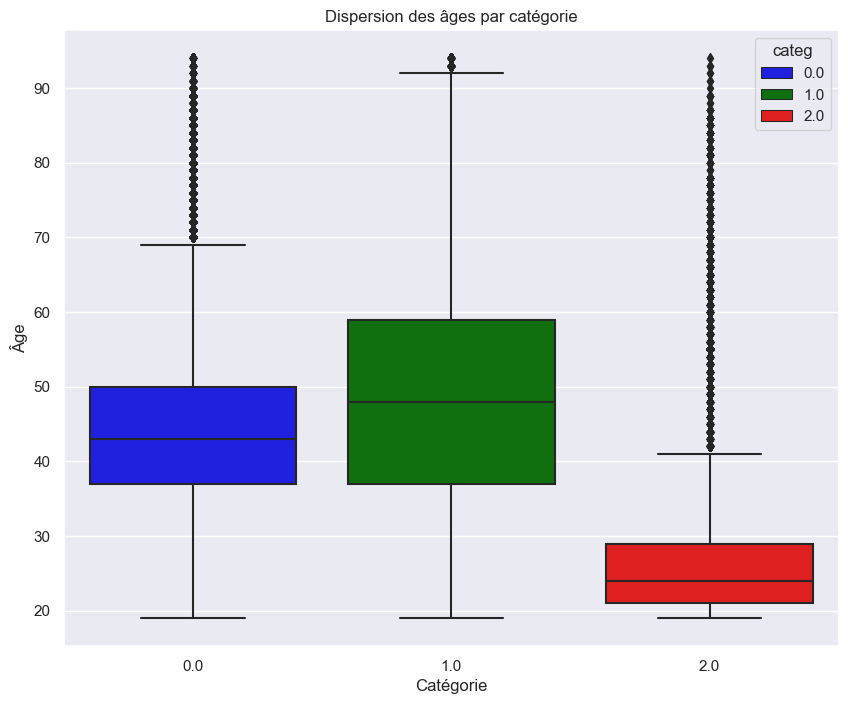

In [166]:
# Présentation de la dispersion des âges des clients par catégorie

sns.set(rc={'figure.figsize': (10, 8)})
ax = sns.boxplot(y="age", x="categ", data=dat_comp,
                 hue='categ', dodge=False, palette=['blue', 'green', 'red'])
ax.set_title('Dispersion des âges par catégorie')
ax.set_xlabel('Catégorie')
ax.set_ylabel('Âge')

#### Test de Normalité

In [167]:
# Test de de Kolmogorov-Sirnov pour vérifier si les données suivent une loi normale
# Catégorie 0
categ0 = scipy.stats.ks_2samp(dat_comp[dat_comp['categ']==0]['age'],list(np.random.normal(np.mean(dat_comp[dat_comp['categ']==0]['age']), np.std(dat_comp[dat_comp['categ']==0]['age']), 1000)))
# Catégorie 1
categ1 = scipy.stats.ks_2samp(dat_comp[dat_comp['categ']==1]['age'],list(np.random.normal(np.mean(dat_comp[dat_comp['categ']==1]['age']), np.std(dat_comp[dat_comp['categ']==1]['age']), 1000)))
#Catégorie 2
categ2 = scipy.stats.ks_2samp(dat_comp[dat_comp['categ']==2]['age'],list(np.random.normal(np.mean(dat_comp[dat_comp['categ']==2]['age']), np.std(dat_comp[dat_comp['categ']==2]['age']), 1000)))

# Afficher les résultats
print('Catégorie 0:',categ0,'\nCatégorie 1:',categ1,'\nCatégorie 2:',categ2)

Catégorie 0: KstestResult(statistic=0.10279361326150693, pvalue=1.262352179459164e-09, statistic_location=51.0, statistic_sign=1) 
Catégorie 1: KstestResult(statistic=0.043, pvalue=0.04882820209467198, statistic_location=18.19704701857283, statistic_sign=-1) 
Catégorie 2: KstestResult(statistic=0.25671907566832797, pvalue=5.652108126502737e-57, statistic_location=31.0, statistic_sign=1)


#### Test Kruskal-Wallis

In [162]:
scipy.stats.kruskal(dat_comp[dat_comp['categ']==0]['age'],dat_comp[dat_comp['categ']==1]['age'],dat_comp[dat_comp['categ']==2]['age'])

KruskalResult(statistic=76842.8237038998, pvalue=0.0)